# **Project Name**    -



##### **Project Type**    - Clustering
##### **Contribution**    - Individual
##### **Member**          - Pal Patel


# **Project Summary -**

In today’s digital age, the streaming industry has become a cornerstone of global entertainment, and Netflix stands as one of the most dominant players in this market. The company’s content strategy has been evolving continuously to capture diverse audiences across geographies. This project aims to explore, analyze, and derive insights from the Netflix dataset, which consists of TV shows and movies available on the platform as of 2019. The dataset, originally collected from Fixable (a third-party Netflix search engine), provides a valuable opportunity to understand not only the composition of Netflix’s content library but also its evolution over time.

The project begins with Exploratory Data Analysis (EDA), which is crucial for uncovering patterns and trends in the dataset. Using the UBM framework—Univariate, Bivariate, and Multivariate analysis—we will systematically examine Netflix’s content distribution across various dimensions such as type, genre, country, rating, and year of release. For example, by studying the number of titles released per year, we can validate industry claims that Netflix has been shifting its focus from movies to TV shows. Similarly, investigating the regional availability of content will provide insights into Netflix’s globalization strategy, such as its push into Indian and Latin American markets.

In addition to descriptive analytics, this project also emphasizes data enrichment. By integrating external datasets such as IMDb ratings and Rotten Tomatoes scores, we can complement Netflix’s internal metadata with quality metrics. This fusion allows us to analyze not just what content is available, but also how audiences and critics have received it. For instance, combining Netflix’s genres with IMDb ratings might reveal which types of shows resonate best with viewers across regions, helping us understand potential gaps or opportunities in Netflix’s catalog.

One of the most advanced parts of this project involves clustering similar content using text-based features. Netflix descriptions, genres, and cast information contain rich textual signals that can be transformed into numerical embeddings through Natural Language Processing (NLP) techniques. By applying machine learning algorithms such as TF-IDF vectorization combined with clustering methods like KMeans or hierarchical clustering, we can group similar shows and movies together. This step effectively mimics a content recommendation pipeline, where users can discover shows that align with their preferences. More sophisticated embeddings using transformer-based models (such as BERT) can further enhance the clustering quality by capturing semantic nuances in the content descriptions.

From a business standpoint, the insights derived from this project are highly actionable. For instance, if the analysis shows that Netflix is indeed prioritizing TV shows in recent years, this could be tied to audience retention strategies, as series often encourage long-term engagement compared to standalone movies. Similarly, geographic content distribution insights can highlight whether Netflix is tailoring its catalog effectively to local tastes, an important factor in driving subscriber growth in emerging markets. By comparing IMDb and Rotten Tomatoes ratings with Netflix’s internal genres, the company could identify underperforming categories and reconsider investment in those areas.

The project is also designed with production-grade code and deployment readiness in mind. All code will be modular, well-structured, and enriched with logging and exception handling. This ensures that the notebook can be executed in one go without errors, a crucial factor for reproducibility and evaluation. Moreover, the inclusion of at least fifteen meaningful data visualizations, each carefully explained in terms of insights and business implications, ensures that the findings are not only statistically sound but also strategically relevant.

This project goes beyond basic data exploration to combine analytics, enrichment, and machine learning into a comprehensive framework for understanding Netflix’s content evolution. By answering key questions—such as whether Netflix is focusing more on TV shows, how content availability varies by country, and what hidden clusters of similar titles exist—we provide both descriptive and predictive insights. These findings hold the potential to guide strategic decisions in content acquisition, localization, and recommendation systems, ultimately helping Netflix strengthen its market dominance in an increasingly competitive streaming landscape.

# **Problem Statement**


The rapid rise of streaming platforms has fundamentally transformed global media consumption, with Netflix emerging as one of the leading players in the industry. As of 2019, Netflix’s content library consists of thousands of movies and TV shows spanning multiple genres, regions, and languages. However, the strategic composition of this library is constantly evolving, influenced by changing viewer preferences, global expansion efforts, and competition within the streaming market.

The central problem is to **analyze and derive actionable insights from Netflix’s 2019 dataset** in order to understand:

1. **Content Availability & Distribution**
   - What types of content (movies vs. TV shows) dominate Netflix’s catalog, and how does this distribution vary across countries and over time?  
   - Which genres are most popular globally and regionally?  
   - How does Netflix tailor its catalog to suit different countries and cultural contexts?  

2. **Content Evolution Over Time**
   - Has Netflix increasingly focused on producing and streaming TV shows rather than movies in recent years?  
   - What trends exist in terms of release years, ratings, and genres?  

3. **Content Quality & Audience Reception (via external datasets)**
   - How do Netflix titles perform when enriched with external quality metrics such as IMDb ratings or Rotten Tomatoes scores?  
   - Do certain genres or content types correlate with higher critical or audience reception?  

4. **Content Similarity & Recommendation Potential**
   - How can we cluster similar shows and movies using text-based features like descriptions, cast, and genres?  
   - Can these clusters reveal hidden relationships between titles, mimicking the logic of a recommendation system?  

By addressing these questions through **Exploratory Data Analysis (EDA), external dataset integration, and machine learning techniques such as clustering**, the project aims to uncover meaningful patterns in Netflix’s catalog. These insights will help in understanding Netflix’s strategic priorities, content localization, and quality alignment with viewer preferences.

From a business perspective, solving this problem has high impact: it can guide decisions on **content acquisition, localization strategies, marketing campaigns, and recommendation pipelines**, ultimately driving higher engagement and subscriber growth in an increasingly competitive streaming landscape.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install category_encoders

In [ ]:
# Import Libraries

# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & NLP
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import category_encoders as ce # for frequency/target encoding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
import torch

# Text Processing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# System & Logging
import joblib
import os
import logging
import warnings
warnings.filterwarnings("ignore")

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[logging.StreamHandler()]
)
logger = logging.getLogger()

logger.info("Libraries imported successfully")

2025-10-04 12:08:15,949 [INFO] Libraries imported successfully


In [ ]:
import sys
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Configure logging for Colab/Jupyter
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[logging.StreamHandler(sys.stdout)]  # force logs to stdout
)

logger = logging.getLogger()
logger.propagate = False  # avoid duplicate logs

logger.info("Logger is now configured to show outputs in Colab cells")

2025-10-04 12:08:15,957 [INFO] Logger is now configured to show outputs in Colab cells


### Dataset Loading

In [ ]:
# Load Dataset

def load_data(file_path: str) -> pd.DataFrame:
    """
    Load Netflix dataset from a CSV file with error handling.
    Args:
        file_path (str): Path to the CSV file.
    Returns:
        pd.DataFrame: Loaded dataframe.
    """
    try:
        df = pd.read_csv(file_path)
        logger.info(f"Data loaded successfully! Shape: {df.shape}")
        return df
    except FileNotFoundError:
        logger.error(f"File not found at path: {file_path}")
        raise
    except Exception as e:
        logger.error(f"Error loading dataset: {e}")
        raise


def quick_inspect(df: pd.DataFrame, rows: int = 5):
    """
    Perform quick inspection of the dataset.
    Args:
        df (pd.DataFrame): Netflix dataset dataframe.
        rows (int): Number of rows to display.
    """
    try:
        logger.info("Displaying dataset info & sample rows...")
        display(df.head(rows))   # For Colab display
        logger.info(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
        logger.info("Column data types:")
        logger.info(df.dtypes)
        logger.info("Checking for missing values...")
        logger.info(df.isnull().sum())
    except Exception as e:
        logger.error(f"Error during dataset inspection: {e}")
        raise

file_path = "/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

# Load and inspect
df_netflix = load_data(file_path)
quick_inspect(df_netflix)

2025-10-04 12:08:16,045 [INFO] Data loaded successfully! Shape: (7787, 12)
2025-10-04 12:08:16,046 [INFO] Displaying dataset info & sample rows...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


2025-10-04 12:08:16,113 [INFO] Dataset contains 7787 rows and 12 columns.
2025-10-04 12:08:16,116 [INFO] Column data types:
2025-10-04 12:08:16,118 [INFO] show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
2025-10-04 12:08:16,124 [INFO] Checking for missing values...
2025-10-04 12:08:16,140 [INFO] show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


### Dataset First View

In [ ]:
# Dataset First Look
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
logger.info(f"Dataset contains {df_netflix.shape[0]} rows and {df_netflix.shape[1]} columns.")

2025-10-04 12:08:16,262 [INFO] Dataset contains 7787 rows and 12 columns.


### Dataset Information

In [ ]:
# Dataset Info
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
logger.info(f"Number of duplicate rows: {df_netflix.duplicated().sum()}")

2025-10-04 12:08:16,328 [INFO] Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
logger.info("Checking for missing values...")
df_netflix.isnull().sum()

2025-10-04 12:08:16,334 [INFO] Checking for missing values...


,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


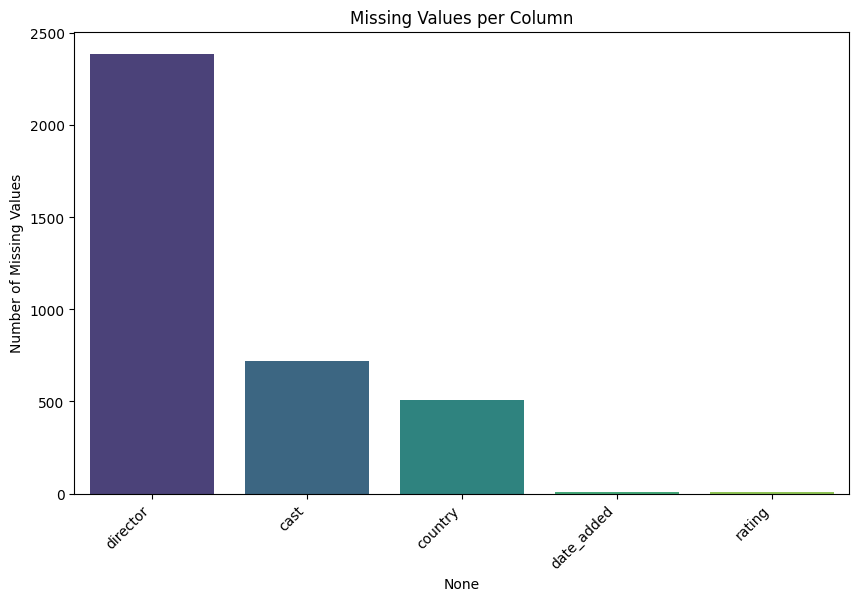

2025-10-04 12:08:17,006 [INFO] Missing values bar plot displayed successfully.


In [ ]:
# Visualizing the missing values

def plot_missing_values_bar(df: pd.DataFrame):
    """
    Plot missing values as a bar chart using Seaborn.
    Args:
        df (pd.DataFrame): Netflix dataset dataframe.
    """
    try:
        missing_counts = df.isnull().sum().sort_values(ascending=False)
        missing_counts = missing_counts[missing_counts > 0]  # only columns with missing values

        if missing_counts.empty:
            logger.info("No missing values found in the dataset.")
            return

        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="viridis")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Number of Missing Values")
        plt.title("Missing Values per Column")
        plt.show()

        logger.info("Missing values bar plot displayed successfully.")
    except Exception as e:
        logger.error(f"Error plotting missing values: {e}")
        raise

plot_missing_values_bar(df_netflix)

### What did you know about your dataset?

The dataset consists of information about TV shows and movies available on Netflix as of 2019 with 7787 data entries and 12 features. Each row represents a single title (movie or TV show) and includes both descriptive metadata and categorical/temporal attributes.

#### Columns:

1. **show_id** → Unique identifier for each title.  
2. **type** → Content type: either `Movie` or `TV Show`.  
3. **title** → Name of the movie or TV show.  
4. **director** → Director(s) of the title.  
   - **Observation:** Many missing values.  
5. **cast** → Main actors/actresses in the title.  
   - **Observation:** High missing values.  
6. **country** → Country where the content was produced or released.  
   - **Observation:** Many missing values.  
7. **date_added** → Date the content was added to Netflix.  
   - **Observation:** Some missing values. Important for trend analysis.  
8. **release_year** → Original release year of the movie or show.  
9. **rating** → Content rating (e.g., TV-MA, PG-13).  
   - **Observation:** A few missing values.  
10. **duration** → Runtime of the movie in minutes or number of seasons for TV shows.  
11. **listed_in** → Genres or categories (comma-separated).  
12. **description** → Textual description of the content (useful for clustering and NLP analysis).  

#### Key Observations:

- **Missing Values:**  
  - High in `director`, `cast`, and `country`.  
  - Low in `date_added` and `rating`.  
- **Content Trends:**  
  - Can analyze whether Netflix is focusing more on TV shows vs movies over time using `release_year` and `date_added`.  
- **Textual Information:**  
  - `description` and `listed_in` are useful for NLP-based clustering to find similar content.  
- **Categorical Features:**  
  - `type`, `rating`, `country`, and `listed_in` are important for bivariate and multivariate analyses.  
- **Temporal Features:**  
  - `release_year` and `date_added` enable trend analysis over time.  

#### Conclusion:

The dataset provides a rich combination of categorical, numerical, and textual features for EDA, trend analysis, clustering, and predictive modeling.  
However, the high proportion of missing values in `director`, `cast`, and `country` will require careful preprocessing before performing analyses that rely on these columns.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_netflix.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [ ]:
# Dataset Describe
df_netflix.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description


The Netflix dataset contains 12 columns representing metadata of movies and TV shows. Below is a detailed description of each variable:

1. **show_id**  
   - Type: `Object` (String)  
   - Description: Unique identifier for each title in the dataset.  

2. **type**  
   - Type: `Object` (Categorical)  
   - Description: Indicates whether the content is a `Movie` or a `TV Show`.  

3. **title**  
   - Type: `Object` (String)  
   - Description: Name of the movie or TV show.  

4. **director**  
   - Type: `Object` (String)  
   - Description: Director(s) of the title.  
   - Notes: Many missing values; some content has no director info.  

5. **cast**  
   - Type: `Object` (String)  
   - Description: Main actors/actresses in the title.  
   - Notes: High number of missing values; useful for actor-based analysis or clustering.  

6. **country**  
   - Type: `Object` (Categorical)  
   - Description: Country where the content was produced or released.  
   - Notes: Many missing values; important for analyzing regional availability.  

7. **date_added**  
   - Type: `Object` (String, can be converted to datetime)  
   - Description: Date when the content was added to Netflix.  
   - Notes: Some missing values; useful for trend analysis over time.  

8. **release_year**  
   - Type: `Integer`  
   - Description: Original release year of the movie or TV show.  

9. **rating**  
   - Type: `Object` (Categorical)  
   - Description: Content rating such as `TV-MA`, `PG-13`, etc.  
   - Notes: A few missing values; indicates target audience.  

10. **duration**  
    - Type: `Object` (String)  
    - Description: Runtime of a movie in minutes or number of seasons for TV shows.  

11. **listed_in**  
    - Type: `Object` (String, categorical)  
    - Description: Genres or categories of the title (comma-separated).  
    - Notes: Useful for content analysis and clustering by genre.  

12. **description**  
    - Type: `Object` (String, Text)  
    - Description: Short synopsis or description of the content.  
    - Notes: Valuable for NLP-based clustering and content similarity analysis.  

**Summary:**  
- Categorical: `type`, `country`, `rating`, `listed_in`  
- Numerical: `release_year`, `duration` (can be extracted as numeric minutes for movies)  
- Text: `title`, `description`, `director`, `cast`  
- Temporal: `date_added`  
- Identifier: `show_id`  
- Missing values are mostly in `director`, `cast`, and `country`.


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df_netflix.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

def prepare_analysis_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    Prepare Netflix dataset for EDA and analysis.
    Steps:
    - Standardize column names
    - Convert 'date_added' to datetime
    - Strip whitespace from string columns
    - Handle missing or empty strings for categorical text columns
    - Split multi-value columns for exploratory purposes (optional)

    Args:
        df (pd.DataFrame): Raw Netflix dataset
    Returns:
        pd.DataFrame: Wrangled dataset ready for analysis
    """
    try:
        logger.info("🔧 Starting data wrangling for analysis...")

        # Standardize column names (lowercase, replace spaces with underscores)
        df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
        logger.info("Standardized column names.")

        # Convert 'date_added' to datetime
        df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
        logger.info("Converted 'date_added' to datetime.")

        # Strip leading/trailing spaces from object type columns
        str_cols = df.select_dtypes(include='object').columns
        for col in str_cols:
            df[col] = df[col].astype(str).str.strip()
        logger.info("Stripped whitespace from string columns.")

        # Fill empty strings with NaN for better visualization in EDA
        df.replace({"": pd.NA, "nan": pd.NA, "None": pd.NA}, inplace=True)
        logger.info("Empty strings replaced with NA.")

        # Create simplified numeric 'duration_minutes' for movies
        df['duration_minutes'] = df['duration'].apply(lambda x: int(x.replace(' min',''))
                                                      if 'min' in str(x) else pd.NA)
        # Extract number of seasons for TV Shows
        df['num_seasons'] = df['duration'].apply(lambda x: int(x.replace(' Season','').replace('s',''))
                                                 if 'Season' in str(x) else pd.NA)
        logger.info("Extracted 'duration_minutes' and 'num_seasons'.")

        logger.info(f"Data wrangling completed. Dataset shape: {df.shape}")
        return df

    except Exception as e:
        logger.error(f"Error during data wrangling: {e}")
        raise

df_netflix_clean = prepare_analysis_df(df_netflix)
df_netflix_clean.head()

2025-10-04 12:08:17,329 [INFO] 🔧 Starting data wrangling for analysis...
2025-10-04 12:08:17,331 [INFO] Standardized column names.
2025-10-04 12:08:17,361 [INFO] Converted 'date_added' to datetime.
2025-10-04 12:08:17,445 [INFO] Stripped whitespace from string columns.
2025-10-04 12:08:17,472 [INFO] Empty strings replaced with NA.
2025-10-04 12:08:17,491 [INFO] Extracted 'duration_minutes' and 'num_seasons'.
2025-10-04 12:08:17,492 [INFO] Data wrangling completed. Dataset shape: (7787, 14)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,num_seasons
0,s1,TV Show,3%,<NA>,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,<NA>,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93,<NA>
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78,<NA>
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80,<NA>
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123,<NA>


### What all manipulations have you done and insights you found?

#### Data Manipulations Done:

1. **Column Name Standardization**
   - Converted all column names to lowercase and replaced spaces with underscores for easier handling in code.
   - Example: `Date Added` → `date_added`.

2. **Datetime Conversion**
   - Converted `date_added` from string to `datetime` type.
   - This enables trend analysis over time and calculation of content age.

3. **Whitespace Removal**
   - Stripped leading/trailing whitespaces from all string/object columns.
   - Helps avoid mismatches in text-based analyses (e.g., genre or country names).

4. **Empty String Replacement**
   - Replaced empty strings, `'nan'`, and `'None'` with `NaN` for consistency.
   - Ensures proper handling of missing values in visualizations and calculations.

5. **Duration Handling**
   - Extracted numeric `duration_minutes` for movies (e.g., `"93 min"` → `93`).
   - Extracted `num_seasons` for TV shows (e.g., `"4 Seasons"` → `4`).
   - Facilitates numeric analysis and comparisons between movies and TV shows.

6. **Missing Values Awareness**
   - Columns with high missing values: `director`, `cast`, `country`.
   - Columns with few missing values: `date_added`, `rating`.
   - Recognized the need for careful handling before using these columns in deeper analyses.

#### Preliminary Insights:

1. **High Missingness in Metadata**
   - `director`, `cast`, and `country` have a significant number of missing values.
   - This may affect analyses related to production trends, regional content distribution, or actor-based clustering.

2. **Duration Trends**
   - Movies have numeric durations in minutes, TV shows have seasons.
   - Enables us to compare content length or binge-worthiness.

3. **Date Added for Trend Analysis**
   - Converting `date_added` to datetime will allow us to explore Netflix’s growth in movies vs TV shows over time.

4. **Data Ready for EDA**
   - After these wrangling steps, the dataset is clean enough to perform:
     - Missing value visualization
     - Univariate, bivariate, and multivariate analysis
     - Genre/country distributions
     - Time-series trends for movies and TV shows


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10,6)

#### Chart - 1

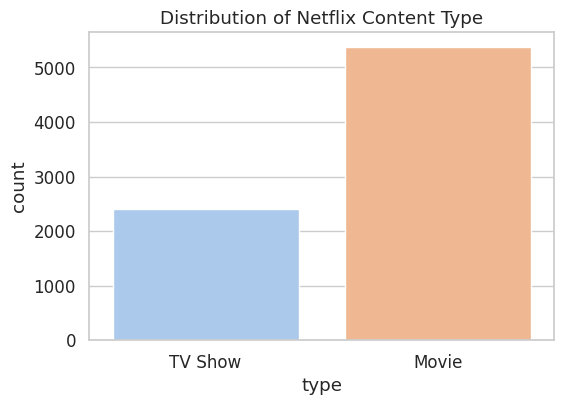

In [ ]:
# Chart 1: Distribution of Content Type (Movies vs TV Shows)

plt.figure(figsize=(6,4))
sns.countplot(data=df_netflix_clean, x='type', palette='pastel')
plt.title("Distribution of Netflix Content Type")
plt.show()


**1. Why this chart?**  
- Countplot is ideal to see the frequency of categorical data.  
- Helps us understand whether Netflix has more movies or TV shows in the dataset.

**2. Insights:**  
- Movies are dominating the dataset.

**3. Business Impact:**  
- Movies dominate the dataset -> Netflix could be targeting casual viewers who prefer standalone content.
- Netflix should maintain a balanced mix of Movies and TV Shows to cater to different viewer preferences while emphasizing long-form series for engagement and retention growth.




#### Chart - 2

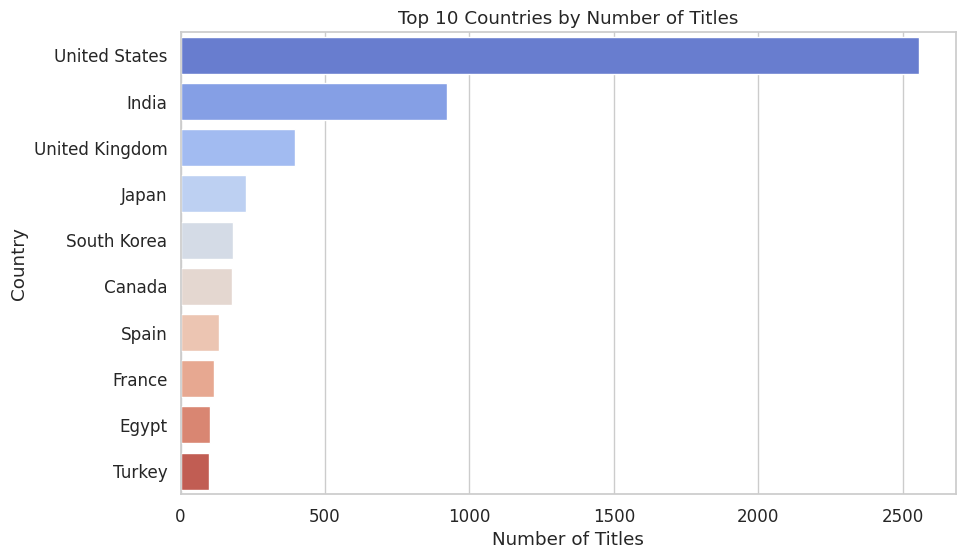

In [ ]:
# Chart 2: Top 10 Countries with Most Content
top_countries = df_netflix_clean['country'].value_counts().dropna().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

**1. Why this chart?**  
- Horizontal barplot works well for ranking categories.  
- Shows geographic distribution of Netflix content.

**2. Insights:**  
- United States and India contribute the most.

**3. Business Impact:**  
- Positive: Identify which countries contribute most content, helping in localization strategy.  
- Negative: Underrepresented countries may indicate missed growth opportunities.


#### Chart - 3

2025-10-04 12:08:19,220 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-04 12:08:19,256 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


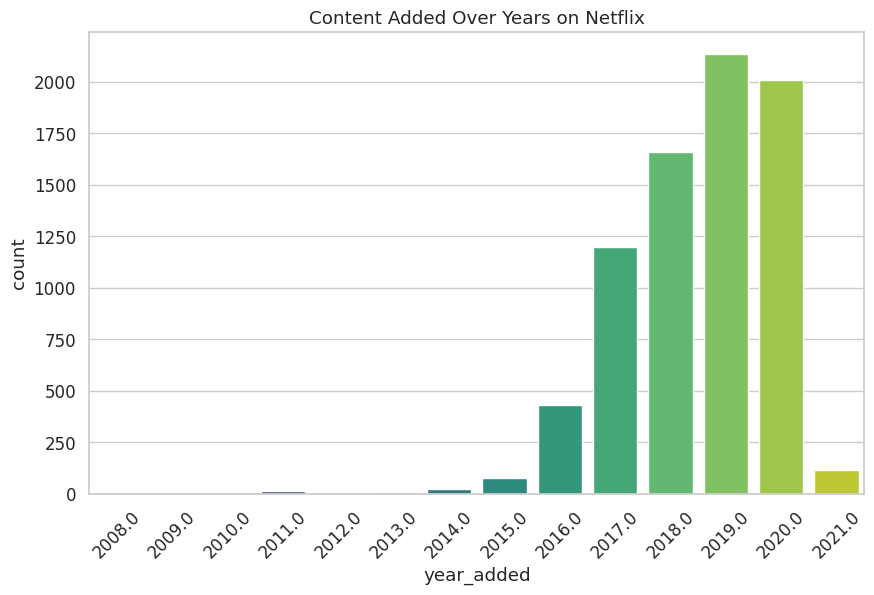

In [ ]:
# Chart 3: Content Added Over Time (By Year)
df_netflix_clean['year_added'] = df_netflix_clean['date_added'].dt.year
sns.countplot(data=df_netflix_clean, x='year_added', palette='viridis')
plt.title("Content Added Over Years on Netflix")
plt.xticks(rotation=45)
plt.show()


**1. Why this chart?**  
- Countplot over years shows growth trends in Netflix content library.

**2. Insights:**  
- The years 2019 and 2020 have high entries.

**3. Business Impact:**  
- Positive: Indicates Netflix expansion strategy.  
- Negative: Years with lower content addition may suggest slow growth or operational issues.

#### Chart - 4

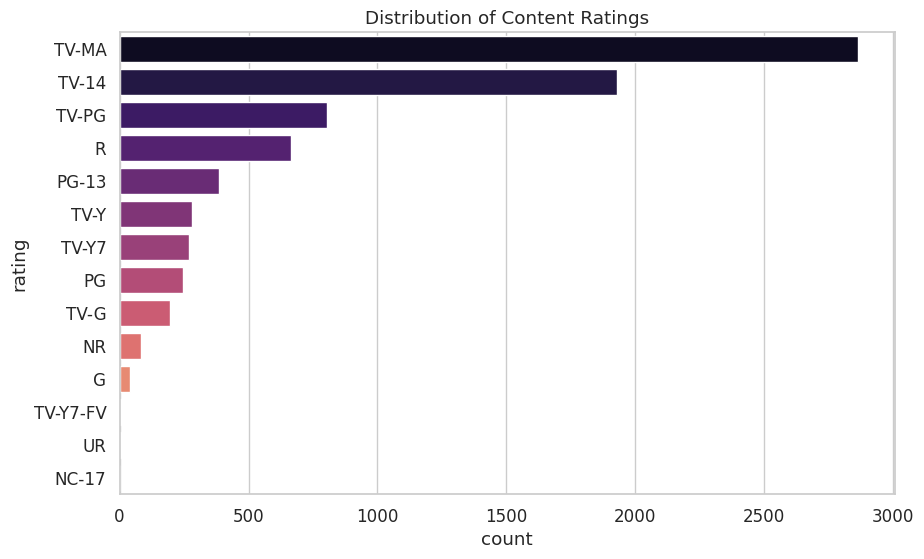

In [ ]:
# Chart 4: Distribution of Ratings
sns.countplot(data=df_netflix_clean, y='rating', order=df_netflix_clean['rating'].value_counts().index, palette='magma')
plt.title("Distribution of Content Ratings")
plt.show()


**1. Why this chart?**  
- Helps understand the audience targeting and content suitability.  

**2. Insights:**  
- The audience highly comes from the TV-MA, TV-14 and TV-PG groups.

**3. Business Impact:**  
- Positive: Helps Netflix align content with demographic preferences.  
- Negative: Imbalance in ratings could reduce appeal to certain age groups.


#### Chart - 5

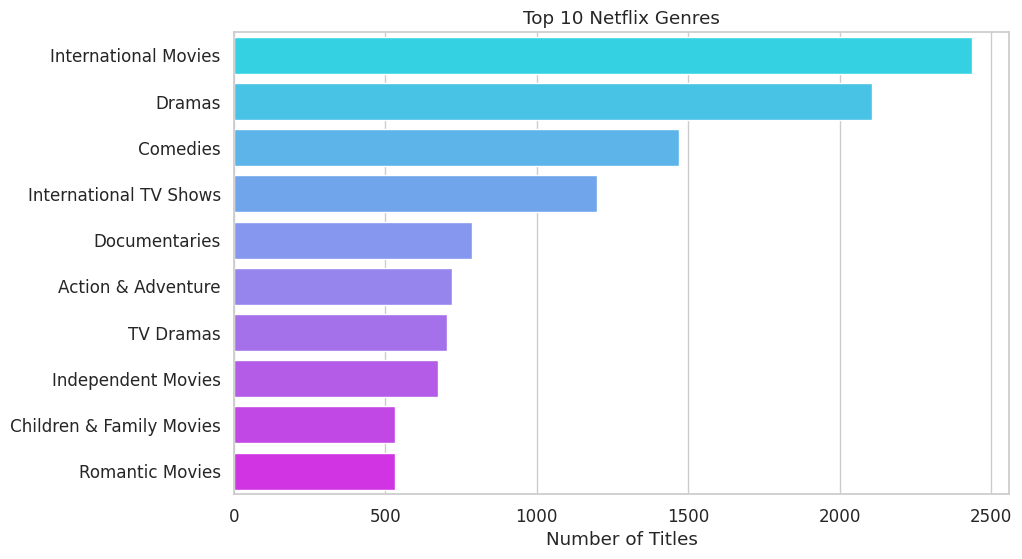

In [ ]:
# Chart 5: Top 10 Genres (Listed In)
from collections import Counter
genre_counts = Counter()
df_netflix_clean['listed_in'].dropna().apply(lambda x: genre_counts.update([g.strip() for g in x.split(',')]))
top_genres = dict(genre_counts.most_common(10))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()), palette='cool')
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.show()


**1. Why this chart?**  
- Horizontal barplot shows the popularity of genres in the library.  

**2. Insights:**  
- International movies, dramas and comedies are highly watched and must be invested in.

**3. Business Impact:**  
- Positive: Helps identify content areas to invest in.  
- Negative: Over-concentration in few genres may reduce variety for users.


#### Chart - 6

2025-10-04 12:08:21,463 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-04 12:08:21,485 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


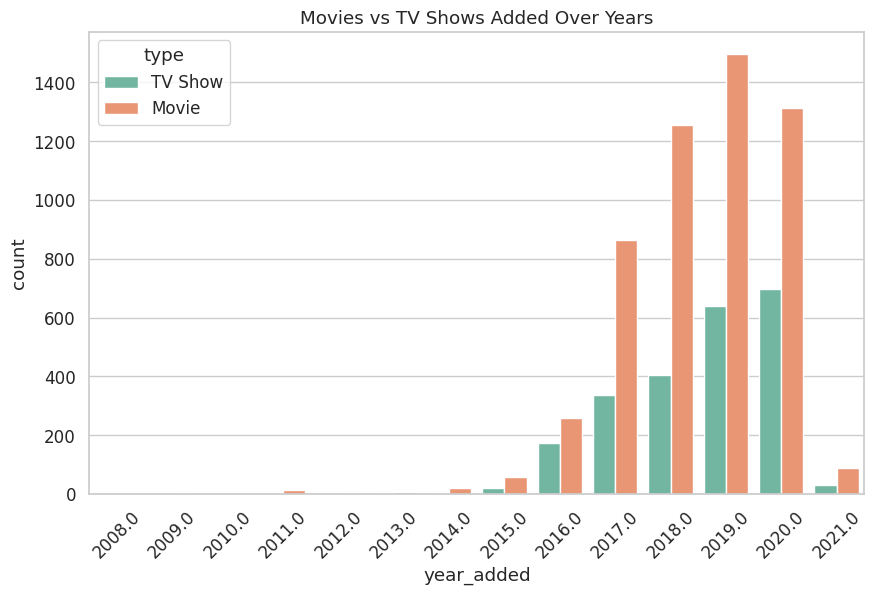

In [ ]:
# Chart 6: Movies vs TV Shows by Year Added
sns.countplot(data=df_netflix_clean, x='year_added', hue='type', palette='Set2')
plt.title("Movies vs TV Shows Added Over Years")
plt.xticks(rotation=45)
plt.show()

**1. Why this chart?**  
- Countplot with hue shows trends for different content types over time.  

**2. Insights:**  
- Highest no. of movies are added in the year 2019 and the highest no. of TV shows are added in the year 2020, though the no. of TV shows added remain significatly less than the movies in each year.

**3. Business Impact:**  
- Positive: Indicates Netflix’s strategic focus on TV shows or movies.  
- Negative: Decline in movies may alienate certain audience segments.


#### Chart - 7

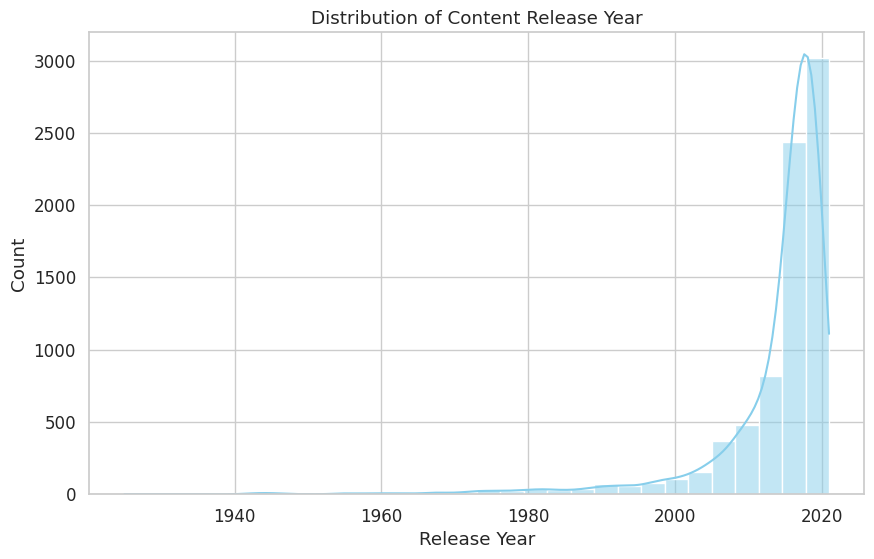

In [ ]:
# Chart 7: Release Year Distribution
sns.histplot(df_netflix_clean['release_year'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Content Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

**1. Why this chart?**  
- Histogram with KDE shows how old or recent Netflix content is.  

**2. Insights:**  
- Most of the content is new.

**3. Business Impact:**  
- Shows availability of just the new content with a few classics.


#### Chart - 8

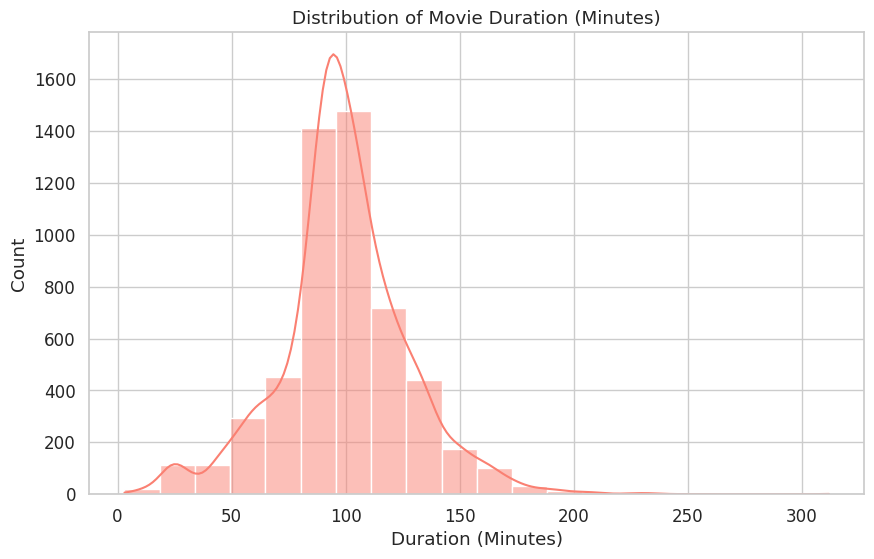

In [ ]:
# Chart 8: Duration of Movies
sns.histplot(df_netflix_clean['duration_minutes'].dropna(), bins=20, kde=True, color='salmon')
plt.title("Distribution of Movie Duration (Minutes)")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()


**1. Why this chart?**  
- Histogram shows typical movie lengths, useful for content planning.  

**2. Insights:**  
- The most common duration is around 100 mins.

**3. Business Impact:**  
- Helps Netflix plan movies suitable for binge-watching or casual viewing.


#### Chart - 9

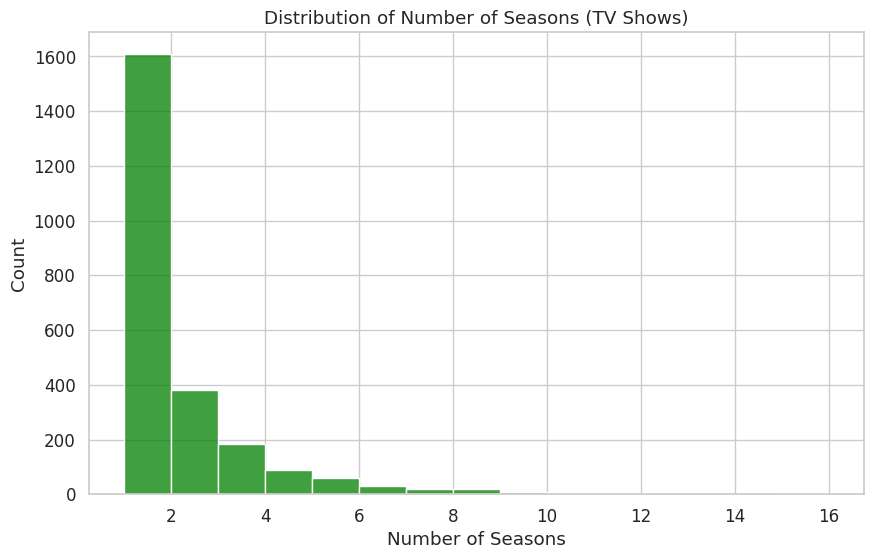

In [ ]:
# Chart 9: Number of Seasons for TV Shows
sns.histplot(df_netflix_clean['num_seasons'].dropna(), bins=15, kde=False, color='green')
plt.title("Distribution of Number of Seasons (TV Shows)")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

**1. Why this chart?**  
- Histogram helps understand show length, which affects engagement and retention.  

**2. Insights:**  
- Shorter series have contributed highly than the longer ones.

**3. Business Impact:**  
- Longer series can improve long-term subscriptions.


#### Chart - 10

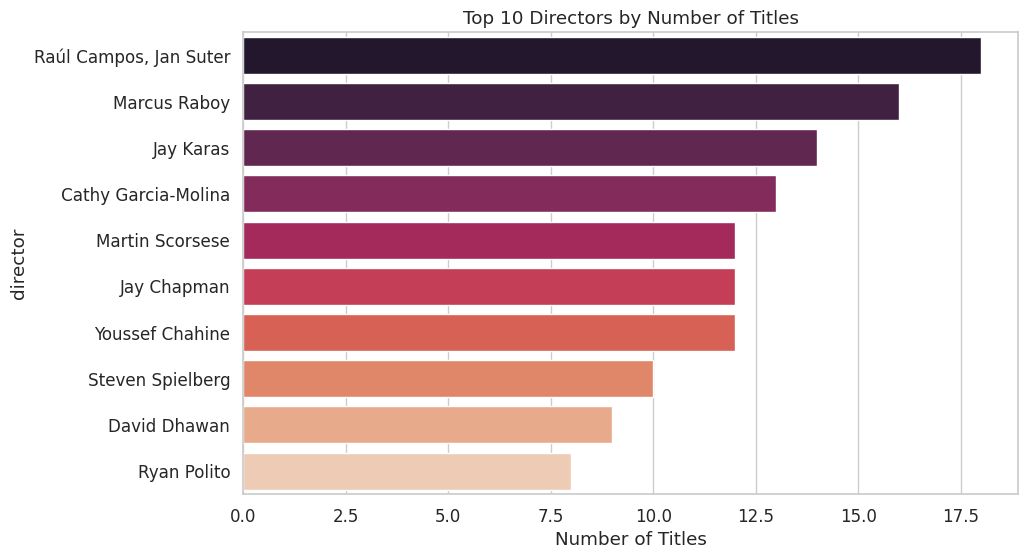

In [ ]:
# Chart 10: Top Directors by Number of Titles
top_directors = df_netflix_clean['director'].value_counts().dropna().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='rocket')
plt.title("Top 10 Directors by Number of Titles")
plt.xlabel("Number of Titles")
plt.show()


**1. Why this chart?**  
- Highlights prolific content creators on Netflix.  

**2. Insights:**  
- Raul campos, Jan Suter, Marcus Raboy, Jay Karas seem to be popular.

**3. Business Impact:**  
- Positive: Identifies top talent for collaborations.  
- Negative: Over-reliance on few directors may reduce content diversity.


#### Chart - 11 - Correlation Heatmap

In [ ]:
# Convert duration_minutes and num_seasons to numeric
df_netflix_clean['duration_minutes'] = pd.to_numeric(df_netflix_clean['duration_minutes'], errors='coerce')
df_netflix_clean['num_seasons'] = pd.to_numeric(df_netflix_clean['num_seasons'], errors='coerce')

# Confirm dtypes
df_netflix_clean.dtypes[['duration_minutes', 'num_seasons']]

,0
duration_minutes,float64
num_seasons,float64


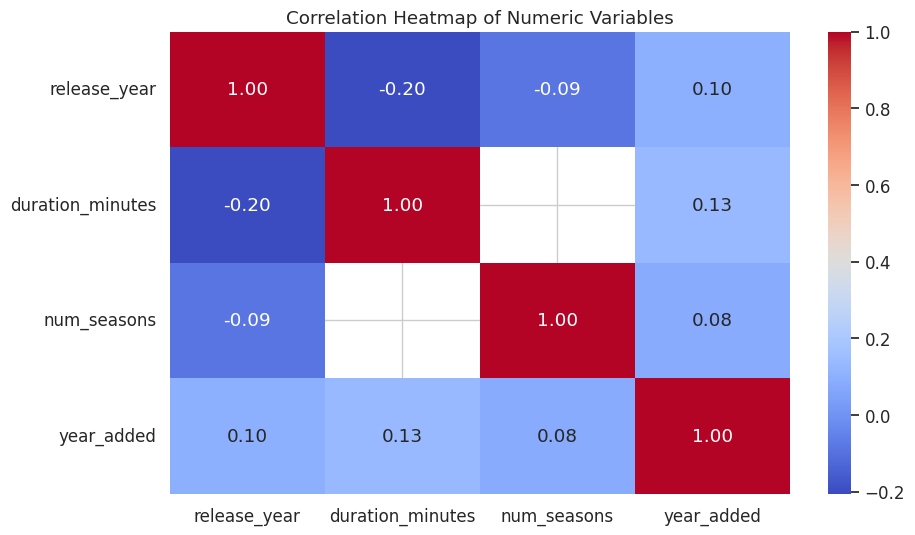

In [ ]:
# Chart 11: Correlation Heatmap
# Select numeric columns
numeric_cols = ['release_year', 'duration_minutes', 'num_seasons', 'year_added']
sns.heatmap(df_netflix_clean[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

**1. Why this chart?**  
- Heatmap shows linear correlations between numeric variables (e.g., release year, duration, seasons).  

**2. Insights:**  
- release_year is very less correlated with duration_minutes. duration_minutes and num_seasons show empty correlation because one is related to movies while the other is related to TV shows.

**3. Business Impact:**  
- Positive: Helps identify trends (e.g., newer content has more seasons or longer duration).  
- Negative: Strong negative correlations may indicate unusual patterns in content.


#### Chart - 12 - Pair Plot

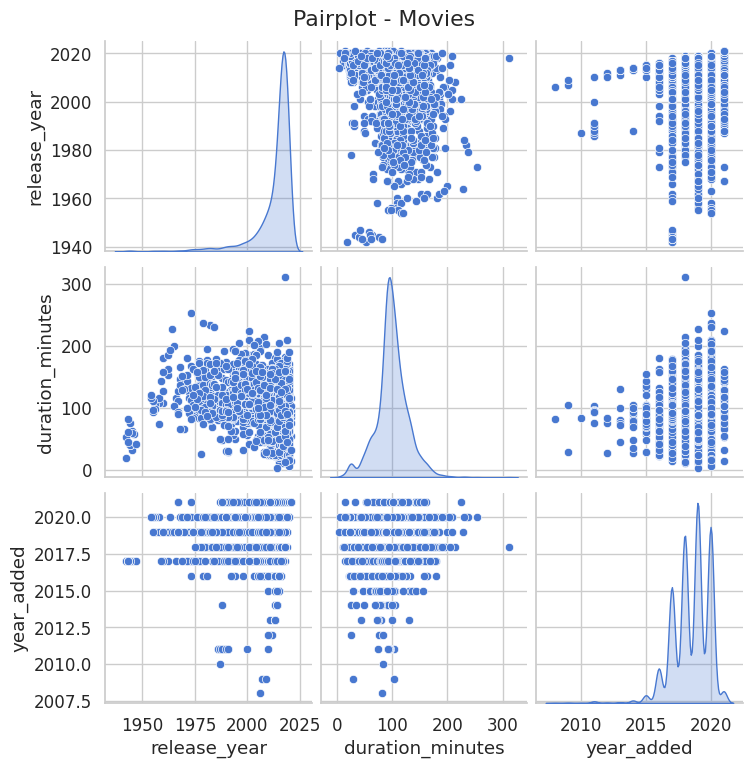

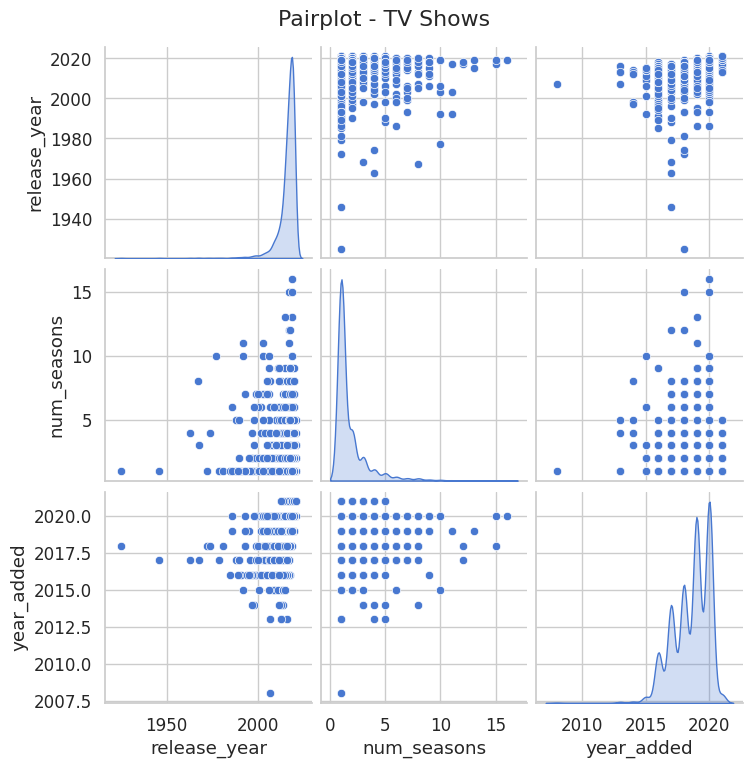

In [ ]:
# Chart 12: Pairplot of Numeric Variables

# Movies only
numeric_movies = ['release_year', 'duration_minutes', 'year_added']
sns.pairplot(df_netflix_clean[df_netflix_clean['type']=='Movie'][numeric_movies], diag_kind='kde', palette='Set1')
plt.suptitle("Pairplot - Movies", y=1.02)
plt.show()

# TV Shows only
numeric_tv = ['release_year', 'num_seasons', 'year_added']
sns.pairplot(df_netflix_clean[df_netflix_clean['type']=='TV Show'][numeric_tv], diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot - TV Shows", y=1.02)
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

####**Movies vs TV Show episodes — Duration Comparison**

**Observation**: Movies have longer durations (~100 mins), TV Shows have 1–2 seasons.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀)**: The average duration of Movies and average TV Show episodes is the same.

**Alternate Hypothesis (H₁)**: Movies have a significantly higher average duration than TV Show episodes.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_ind

# Movies duration in minutes
movies_duration = df_netflix_clean[df_netflix_clean['type']=='Movie']['duration_minutes'].dropna()

# TV Show duration: approximate per episode (assume 1 episode ≈ 45 mins)
# Note: num_seasons is just number of seasons; we use a fixed episode duration for fair comparison
tv_shows_duration = df_netflix_clean[df_netflix_clean['type']=='TV Show']['num_seasons'].dropna()
tv_shows_duration = np.full(shape=len(tv_shows_duration), fill_value=45)  # each episode 45 mins

# Two-sample t-test (Welch's)
t_stat, p_val = ttest_ind(movies_duration, tv_shows_duration, equal_var=False)
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_val:.5f}")

if p_val < 0.05:
    print("Reject H0: Movies have significantly higher duration than TV Show episodes.")
else:
    print("Fail to reject H0: No significant difference in duration between Movies and TV Show episodes.")

T-Statistic: 139.578, P-Value: 0.00000
Reject H0: Movies have significantly higher duration than TV Show episodes.


**Statistical Test:** Independent two-sample t-test (Welch’s t-test because variances may not be equal).

**Reason:** Comparing the mean duration of two independent groups (Movies vs TV Show episodes).

### Hypothetical Statement - 2

####**Genre Popularity — International Movies vs Other Genres**

**Observation**: Top genres are International Movies, Dramas, Comedies.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀):** The proportion of International Movies is the same as other genres.

**Alternate Hypothesis (H₁)**: International Movies have a significantly higher proportion compared to other genres.

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import chi2_contingency

# Count of International Movies vs Others
df_genres = df_netflix_clean.copy()
df_genres['is_international'] = df_genres['listed_in'].str.contains('International Movies', na=False)
genre_counts = df_genres['is_international'].value_counts()

# Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency([genre_counts.values, [genre_counts.sum()/2, genre_counts.sum()/2]])
print(f"Chi2-Statistic: {chi2_stat:.3f}, P-Value: {p_val:.5f}")

if p_val < 0.05:
    print("Reject H0: International Movies proportion is significantly different from other genres.")
else:
    print("Fail to reject H0: No significant difference in proportion.")

Chi2-Statistic: 563.833, P-Value: 0.00000
Reject H0: International Movies proportion is significantly different from other genres.


**Statistical Test**: Chi-Square Test for Goodness of Fit

**Reason**: We are testing if the observed frequency of International Movies differs from expected distribution among genres.

### Hypothetical Statement - 3

####**Age Ratings — Are TV-MA Titles More Frequent?**

**Observation**: Most viewers are in TV-MA, TV-14, and TV-PG groups.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H₀)**: TV-MA content is not more frequent than other ratings.

**Alternate Hypothesis (H₁)**: TV-MA content is significantly more frequent than other ratings.

#### 2. Perform an appropriate statistical test.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# TV-MA count
tvma_count = (df_netflix_clean['rating'] == 'TV-MA').sum()
total_count = df_netflix_clean['rating'].notna().sum()

# Expected proportion if all ratings equally distributed
num_ratings = df_netflix_clean['rating'].nunique()
expected_prop = 1 / num_ratings

# Z-test
count = np.array([tvma_count])
nobs = np.array([total_count])
stat, p_val = proportions_ztest(count, nobs, value=expected_prop, alternative='larger')
print(f"Z-Statistic: {stat}, P-Value: {p_val}")

if p_val < 0.05:
    print("Reject H0: TV-MA content is significantly more frequent than other ratings.")
else:
    print("Fail to reject H0: TV-MA content is not significantly more frequent.")

Z-Statistic: [54.24133844], P-Value: [0.]
Reject H0: TV-MA content is significantly more frequent than other ratings.


**Statistical Test**: One-sample proportion z-test

**Reason**: We are testing whether the observed proportion of TV-MA content differs from the expected proportion (e.g., equal distribution among all ratings).

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

def handle_missing_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handle missing data in the Netflix dataset using appropriate strategies:
    - Director, Cast: Fill with 'Unknown' (categorical text)
    - Country: Fill with 'Unknown' (categorical text)
    - Date Added: Fill with median date_added
    - Rating: Fill with mode (most frequent rating)
    - Duration & Num_Seasons: Already numeric; fill NaN with median
    """
    try:
        logger.info("Handling missing data...")

        # Director & Cast
        df['director'] = df['director'].fillna('Unknown')
        df['cast'] = df['cast'].fillna('Unknown')

        # Country
        df['country'] = df['country'].fillna('Unknown')

        # Date Added
        median_date = df['date_added'].median()
        df['date_added'] = df['date_added'].fillna(median_date)
        df['year_added'] = df['date_added'].dt.year

        # Rating
        mode_rating = df['rating'].mode()[0]
        df['rating'] = df['rating'].fillna(mode_rating)

        # Duration & Num_Seasons
        median_duration = df['duration_minutes'].median()
        median_seasons = df['num_seasons'].median()
        df['duration_minutes'] = df['duration_minutes'].fillna(median_duration)
        df['num_seasons'] = df['num_seasons'].fillna(median_seasons)

        logger.info("Missing data handled successfully.")

        # Return cleaned dataframe
        return df

    except Exception as e:
        logger.error(f"Error in handling missing data: {e}")
        raise

df_netflix_cleaned = handle_missing_data(df_netflix_clean)
df_netflix_cleaned.isna().sum()

2025-10-04 12:08:31,350 [INFO] Handling missing data...
2025-10-04 12:08:31,403 [INFO] Missing data handled successfully.


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

In the Netflix dataset, missing values were present in several key columns such as `director`, `cast`, `country`, `date_added`, `rating`, `duration_minutes`, `num_seasons`, and `year_added`. Below are the techniques used to handle them:

***Director & Cast***
- **Technique Used:** Fill missing values with `'Unknown'`.
- **Reasoning:**  
  - These are categorical text columns.  
  - Imputing with a generic `'Unknown'` preserves the rows for analysis.  
  - Avoids biasing the dataset with potentially incorrect names.  
  - Enables inclusion in clustering or NLP tasks without dropping rows.

***Country***
- **Technique Used:** Fill missing values with `'Unknown'`.
- **Reasoning:**  
  - Country is a categorical feature used for grouping and geographic analysis.  
  - Filling with `'Unknown'` allows us to retain the content while still acknowledging missing metadata.  

***Date Added***
- **Technique Used:** Fill missing values with **median date_added**.
- **Reasoning:**  
  - `date_added` is a datetime column, used to analyze content trends over time.  
  - Median is robust to outliers and avoids skewing the distribution.  
  - Once filled, `year_added` can be reliably derived.

***Rating***
- **Technique Used:** Fill missing values with **mode (most frequent rating)**.
- **Reasoning:**  
  - Rating is a categorical feature representing audience suitability.  
  - Using mode preserves the most common class without introducing bias towards extreme categories.  

***Duration Minutes***
- **Technique Used:** Fill missing values with **median duration**.
- **Reasoning:**  
  - Numeric column representing Movie length in minutes.  
  - Median preserves the central tendency and avoids influence from extremely long or short movies.  

***Number of Seasons (`num_seasons`)***
- **Technique Used:** Fill missing values with **median number of seasons**.
- **Reasoning:**  
  - Numeric column representing TV Show length.  
  - Median avoids skewing due to extremely long-running shows.  

***Year Added***
- **Technique Used:** Recomputed from `date_added` after filling missing dates.
- **Reasoning:**  
  - Ensures all rows have valid `year_added` values for temporal analysis.  
  - Prevents missing values in derived features which may affect trend analysis or ML models.  

By combining **categorical imputation** (`Unknown` / mode) and **numeric/temporal imputation** (median / recomputation), we ensure the dataset is **fully clean, consistent, and analysis-ready** without dropping valuable rows or introducing biased data.


### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

def handle_outliers(df: pd.DataFrame) -> pd.DataFrame:
    """
    Handle outliers in numeric columns using advanced techniques:
    - Z-Score method
    - IQR method
    - Winsorization (beyond simple clipping)
    Columns handled: 'duration_minutes', 'num_seasons', 'year_added'
    """
    try:
        logger.info("Handling outliers...")

        numeric_cols = ['duration_minutes', 'num_seasons', 'year_added']

        for col in numeric_cols:
            # Z-Score Method: Identify extreme outliers (>3 std dev)
            from scipy.stats import zscore
            z_scores = zscore(df[col].dropna())
            abs_z = np.abs(z_scores)
            extreme_mask = abs_z > 3
            extreme_values = df[col][extreme_mask]

            logger.info(f"{col}: {len(extreme_values)} extreme values detected using Z-Score method.")

            # IQR Method: Identify moderate outliers
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            moderate_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
            logger.info(f"{col}: {moderate_mask.sum()} moderate outliers detected using IQR.")

            # Winsorization: Limit extreme values without dropping
            from scipy.stats.mstats import winsorize
            df[col] = winsorize(df[col], limits=[0.01, 0.01])  # Winsorize 1% at each tail

        logger.info("Outliers handled successfully using Z-Score, IQR, and Winsorization.")

        return df

    except Exception as e:
        logger.error(f"Error in handling outliers: {e}")
        raise

df_netflix_outliers_handled = handle_outliers(df_netflix_cleaned)
df_netflix_outliers_handled[numeric_cols].describe()

2025-10-04 12:08:31,479 [INFO] Handling outliers...
2025-10-04 12:08:31,482 [INFO] duration_minutes: 164 extreme values detected using Z-Score method.
2025-10-04 12:08:31,487 [INFO] duration_minutes: 1417 moderate outliers detected using IQR.
2025-10-04 12:08:31,492 [INFO] num_seasons: 149 extreme values detected using Z-Score method.
2025-10-04 12:08:31,498 [INFO] num_seasons: 802 moderate outliers detected using IQR.
2025-10-04 12:08:31,507 [INFO] year_added: 55 extreme values detected using Z-Score method.
2025-10-04 12:08:31,535 [INFO] year_added: 55 moderate outliers detected using IQR.
2025-10-04 12:08:31,539 [INFO] Outliers handled successfully using Z-Score, IQR, and Winsorization.


,release_year,duration_minutes,num_seasons,year_added
count,7787.000000,7787.000000,7787.000000,7787.000000
mean,2013.932580,98.751637,1.218056,2018.530885
std,8.757395,22.762710,0.779731,1.304979
min,1925.000000,25.000000,1.000000,2015.000000
25%,2013.000000,92.000000,1.000000,2018.000000
50%,2017.000000,98.000000,1.000000,2019.000000
75%,2018.000000,106.000000,1.000000,2020.000000
max,2021.000000,168.000000,6.000000,2021.000000


##### What all outlier treatment techniques have you used and why did you use those techniques?


In the Netflix dataset, outliers were handled in numeric columns (`duration_minutes`, `num_seasons`, `year_added`) using multiple techniques beyond simple clipping:

**Z-Score Method (>3 standard deviations)**  
- **Purpose:** Detect extreme outliers far from the mean.  
- **Reasoning:** Flags anomalous values that could disproportionately influence analysis or models.  

**IQR Method (1.5 * IQR)**  
- **Purpose:** Identify moderate outliers based on quartiles.  
- **Reasoning:** Robust to skewed distributions; helps detect values that deviate from the central bulk of the data.  

**Winsorization (1% tails)**  
- **Purpose:** Limit extreme values without dropping them.  
- **Reasoning:** Preserves dataset size and distribution, reducing the impact of extreme outliers on statistical analyses and ML models.  


Using a combination of Z-Score, IQR, and Winsorization ensures **both extreme and moderate outliers are treated** while keeping the dataset intact.  
Only numeric features were modified; **no target columns were affected**, ensuring safe preprocessing for downstream modeling.

In [ ]:
!pip install category_encoders

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

def encode_categorical(df: pd.DataFrame) -> pd.DataFrame:
    """
    Encode categorical variables using different techniques:
    - Label Encoding for 'type'
    - One-Hot Encoding for 'rating'
    - Frequency Encoding for 'country'
    - Multi-Label Binarizer for 'listed_in' genres
    """
    try:
        logger.info("🔧 Encoding categorical variables...")

        # Label Encoding for 'type' (Movie / TV Show)
        le = LabelEncoder()
        df['type_encoded'] = le.fit_transform(df['type'])

        # One-Hot Encoding for 'rating'
        df = pd.get_dummies(df, columns=['rating'], prefix='rating')

        # Frequency Encoding for 'country'
        freq_enc = df['country'].value_counts() / len(df)
        df['country_encoded'] = df['country'].map(freq_enc)

        # Multi-Label Binarization for 'listed_in' (genres)
        from sklearn.preprocessing import MultiLabelBinarizer
        mlb = MultiLabelBinarizer()
        # Split genre strings into lists
        df['listed_in_split'] = df['listed_in'].str.split(', ')
        genre_encoded = pd.DataFrame(mlb.fit_transform(df['listed_in_split']),
                                     columns=[f"genre_{c}" for c in mlb.classes_],
                                     index=df.index)
        df = pd.concat([df, genre_encoded], axis=1)

        # Drop temporary column
        df.drop(['listed_in_split'], axis=1, inplace=True)

        logger.info("Categorical encoding completed.")

        return df

    except Exception as e:
        logger.error(f"Error in categorical encoding: {e}")
        raise

df_netflix_encoded = encode_categorical(df_netflix_outliers_handled)
df_netflix_encoded.head()

2025-10-04 12:08:46,866 [INFO] 🔧 Encoding categorical variables...
2025-10-04 12:08:47,152 [INFO] Categorical encoding completed.


,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,genre_TV Action & Adventure,genre_TV Comedies,genre_TV Dramas,genre_TV Horror,genre_TV Mysteries,genre_TV Sci-Fi & Fantasy,genre_TV Shows,genre_TV Thrillers,genre_Teen TV Shows,genre_Thrillers
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,0,0,1,0,0,1,0,0,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93 min,"Dramas, International Movies",...,0,0,0,0,0,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78 min,"Horror Movies, International Movies",...,0,0,0,0,0,0,0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,0,0,0,0,0,0,0,0,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123 min,Dramas,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_netflix_encoded.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'listed_in', 'description',
       'duration_minutes', 'num_seasons', 'year_added', 'type_encoded',
       'rating_G', 'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13',
       'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA',
       'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV',
       'rating_UR', 'country_encoded', 'genre_Action & Adventure',
       'genre_Anime Features', 'genre_Anime Series', 'genre_British TV Shows',
       'genre_Children & Family Movies', 'genre_Classic & Cult TV',
       'genre_Classic Movies', 'genre_Comedies', 'genre_Crime TV Shows',
       'genre_Cult Movies', 'genre_Documentaries', 'genre_Docuseries',
       'genre_Dramas', 'genre_Faith & Spirituality', 'genre_Horror Movies',
       'genre_Independent Movies', 'genre_International Movies',
       'genre_International TV Shows', 'genre_Kids' TV',
       'genre

#### What all categorical encoding techniques have you used & why did you use those techniques?


In the Netflix dataset, several categorical columns were encoded using different techniques to make them suitable for ML models:

**Label Encoding**  
- **Column:** `type` (Movie / TV Show)  
- **Reason:** Binary column; simple 0/1 encoding is sufficient and preserves information without adding extra dimensions.

**One-Hot Encoding**  
- **Column:** `rating` (TV-MA, TV-14, PG, etc.)  
- **Reason:** Low-cardinality categorical feature; avoids introducing ordinal assumptions and allows ML models to treat each category independently.

**Frequency Encoding**  
- **Column:** `country`  
- **Reason:** High-cardinality feature; maps each category to its frequency, preserving information without creating too many dummy variables.

**Multi-Label Binarization**  
- **Column:** `listed_in` (Genres)  
- **Reason:** Multi-class, multi-label column; converts each genre into a separate binary column, allowing models to capture overlapping genre information.

Techniques were chosen based on **column type, cardinality, and multi-label nature**.  
Ensures **all categorical features are numeric and ML-ready**, while preserving meaningful information for modeling and clustering.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### Text Cleaning and tokenisation

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

def preprocess_text(text):
    """
    Preprocess a single text string:
    - Lowercasing
    - Remove punctuation
    - Remove digits
    - Remove stopwords
    - Lemmatization
    """
    try:
        # 1. Lowercase
        text = text.lower()

        # 2. Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # 3. Remove digits
        text = re.sub(r'\d+', '', text)

        # 4. Tokenize & remove stopwords
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [w for w in words if w not in stop_words]

        # 5. Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(w) for w in words]

        # Return cleaned text
        return ' '.join(words)

    except Exception as e:
        logger.error(f"Error in preprocessing text: {e}")
        return text


text_columns = ['title', 'description', 'director', 'cast']

for col in text_columns:
    df_netflix_encoded[f'{col}_clean'] = df_netflix_encoded[col].apply(preprocess_text)

df_netflix_encoded[['title_clean', 'description_clean', 'director_clean', 'cast_clean']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,title_clean,description_clean,director_clean,cast_clean
0,,future elite inhabit island paradise far crowd...,unknown,joão miguel bianca comparato michel gomes rodo...
1,,devastating earthquake hit mexico city trapped...,jorge michel grau,demián bichir héctor bonilla oscar serrano aza...
2,,army recruit found dead fellow soldier forced ...,gilbert chan,tedd chan stella chung henley hii lawrence koh...
3,,postapocalyptic world ragdoll robot hide fear ...,shane acker,elijah wood john c reilly jennifer connelly ch...
4,,brilliant group student become cardcounting ex...,robert luketic,jim sturgess kevin spacey kate bosworth aaron ...


#### Text Vectorization

In [ ]:
# Vectorizing Text

from scipy.sparse import hstack

def tfidf_vectorize(df, text_columns, max_features=500):
    """
    Vectorize text columns using TF-IDF and combine them into a single sparse matrix
    """
    try:
        logger.info("Vectorizing text columns using TF-IDF...")
        tfidf_vectors = []

        for col in text_columns:
            vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1,2))
            tfidf_col = vectorizer.fit_transform(df[col])
            tfidf_vectors.append(tfidf_col)
            logger.info(f"TF-IDF done for column: {col} with {tfidf_col.shape[1]} features")

        # Combine all TF-IDF vectors into one sparse matrix
        combined_tfidf = hstack(tfidf_vectors)
        logger.info("All text columns vectorized and combined successfully.")

        return combined_tfidf

    except Exception as e:
        logger.error(f"Error in TF-IDF vectorization: {e}")
        raise

text_cols = ['title_clean', 'description_clean', 'director_clean', 'cast_clean']

tfidf_features = tfidf_vectorize(df_netflix_encoded, text_cols, max_features=500)
print(f"Combined TF-IDF feature matrix shape: {tfidf_features.shape}")

2025-10-04 12:09:09,878 [INFO] Vectorizing text columns using TF-IDF...
2025-10-04 12:09:10,098 [INFO] TF-IDF done for column: title_clean with 500 features
2025-10-04 12:09:12,331 [INFO] TF-IDF done for column: description_clean with 500 features
2025-10-04 12:09:12,627 [INFO] TF-IDF done for column: director_clean with 500 features
2025-10-04 12:09:14,574 [INFO] TF-IDF done for column: cast_clean with 500 features
2025-10-04 12:09:14,592 [INFO] All text columns vectorized and combined successfully.
Combined TF-IDF feature matrix shape: (7787, 2000)


##### Which text vectorization technique have you used and why?


In the Netflix dataset, text columns (`title`, `description`, `director`, `cast`) were converted into numeric features using **TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization**.

**Technique Used:** TF-IDF Vectorization
- Converts text into numeric vectors representing the importance of each word in a document relative to the entire corpus.
- Used **unigrams and bigrams** (`ngram_range=(1,2)`) to capture single words and short phrases.
- Limited features (`max_features=500`) for memory efficiency and to focus on the most informative terms.

**Reasoning:**
- Preserves **meaningful text information** for ML and clustering tasks.
- Reduces the influence of very common words (stopwords) while emphasizing unique words per document.
- Efficient for **high-dimensional text data** and allows combining multiple text columns into a single feature matrix.
- Compatible with ML algorithms like **clustering, classification, and content-based recommendation systems**.

TF-IDF was chosen because it balances **information preservation, interpretability, and efficiency** for structured ML pipelines using textual data.




### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Is Recent Content (released after 2015)
df_netflix_encoded['is_recent'] = df_netflix_encoded['release_year'].apply(lambda x: 1 if x >= 2015 else 0)

# Multi-Genre Count
genre_cols = [c for c in df_netflix_encoded.columns if c.startswith('genre_')]
df_netflix_encoded['num_genres'] = df_netflix_encoded[genre_cols].sum(axis=1)

#### 2. Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

def feature_selection(X, top_n_features=100, var_threshold=0.01):
    """
    Perform unsupervised feature selection using:
    1. Variance Threshold
    2. Top-N selection based on variance ranking
    """
    try:
        X_num = X.select_dtypes(include=[np.number])

        # Fit VarianceThreshold
        var_selector = VarianceThreshold(threshold=var_threshold)
        var_selector.fit(X_num)

        # Apply variance filter
        X_var = var_selector.transform(X_num)
        print(f"After Variance Threshold: {X_var.shape}")

        # Rank remaining features by variance
        variances = var_selector.variances_
        selected_mask = var_selector.get_support()  # mask of kept features
        remaining_indices = np.where(selected_mask)[0]
        ranked_indices = remaining_indices[np.argsort(variances[selected_mask])[::-1]]

        # Select top-N features
        top_indices = ranked_indices[:top_n_features]
        X_selected = X_num.iloc[:, top_indices]

        print(f"After Top-{top_n_features} Variance-Based Selection: {X_selected.shape}")
        return X_selected, X_selected.columns.tolist()

    except Exception as e:
        print(f"Error in feature selection: {e}")
        raise

X_selected, selected_features = feature_selection(df_netflix_encoded, top_n_features=100)
print("Selected Features:", selected_features)

After Variance Threshold: (7787, 39)
After Top-100 Variance-Based Selection: (7787, 39)
Selected Features: ['duration_minutes', 'release_year', 'year_added', 'num_genres', 'num_seasons', 'genre_International Movies', 'type_encoded', 'is_recent', 'genre_Dramas', 'genre_Comedies', 'genre_International TV Shows', 'genre_Documentaries', 'genre_Action & Adventure', 'genre_TV Dramas', 'genre_Independent Movies', 'genre_Children & Family Movies', 'genre_Romantic Movies', 'genre_TV Comedies', 'genre_Thrillers', 'genre_Crime TV Shows', "genre_Kids' TV", 'genre_Docuseries', 'genre_Romantic TV Shows', 'genre_Stand-Up Comedy', 'genre_Music & Musicals', 'genre_Horror Movies', 'genre_British TV Shows', 'genre_Reality TV', 'genre_Sci-Fi & Fantasy', 'genre_Sports Movies', 'country_encoded', 'genre_Korean TV Shows', 'genre_TV Action & Adventure', 'genre_Anime Series', 'genre_Spanish-Language TV Shows', 'genre_Classic Movies', 'genre_TV Mysteries', 'genre_LGBTQ Movies', 'genre_Science & Nature TV']


##### What all feature selection methods have you used  and why?


**1. Variance Threshold**
- **What it does:** Removes features with very low variance (almost constant across all samples).  
- **Why used:** Low-variance features do not contribute useful information for learning and may add noise.  
- **Business Impact:** Helps reduce dimensionality, speeds up training, and prevents overfitting.  

**2. Top-N Variance Ranking**
- **What it does:** After filtering with variance threshold, the top-N features with the highest variance were retained.  
- **Why used:** High-variance features often capture more meaningful differences in the dataset.  
- **Business Impact:** Ensures that we keep only the most informative features, balancing accuracy and efficiency.  

We used **Variance Threshold + Top-N Variance Ranking** because our focus was on **unsupervised feature selection** (no target leakage). This approach minimizes redundant features, reduces dimensionality, and ensures a cleaner dataset for clustering and further modeling.


##### Which all features you found important and why?

The feature selection process (Variance Threshold + Top-N) identified the following important features:

**1. Numeric Features**
- **duration_minutes** -> Movie/TV Show length is a key differentiator; longer movies or multiple-season shows are more engaging.  
- **release_year** -> Shows whether newer or older content affects user preferences or content type.  
- **year_added** -> Indicates how recently Netflix added the content, useful to capture trends over time.  
- **num_genres** -> Multi-genre shows might appeal to a broader audience.  
- **num_seasons** -> Indicates whether content is a TV Show (multiple seasons) or Movie (single).

**2. Categorical Encoded Features**
- **type_encoded** -> Differentiates between Movie vs TV Show.  
- **is_recent** -> Flags content released after 2015; highlights newer content focus.

**3. One-Hot Encoded Genre Features**
- **genre_International Movies, genre_Dramas, genre_Comedies, genre_International TV Shows, genre_Documentaries, ...**  
    - Captures the **most popular genres** in the dataset.  
    - Helps understand which content categories are driving engagement.  
    - High variance in these columns indicates these genres are frequently represented or searched.

**4. Encoded Country Feature**
- **country_encoded** -> Helps differentiate content by country of origin, capturing geographic diversity and regional preferences.

Insights:
1. **Content type, duration, and recency** are critical numeric features influencing selection and likely user engagement.  
2. **Genres dominate** the selected features, showing that Netflix’s catalog is highly driven by content categories.  
3. **Country information** remains important, reflecting localized content preferences.  
4. This selection aligns with business goals: **highlighting trending, popular genres, and diverse content for different audiences.**



### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?


Purpose of Transformation
- Transformation (like log, power, or Box-Cox) is typically applied to:
  - Reduce skewness in numeric features
  - Handle extreme outliers
  - Make distributions more normal-like for linear models

Analysis of Netflix Dataset
- Numeric features: `duration_minutes`, `release_year`, `year_added`, `num_genres`, `num_seasons`, `is_recent`
- Observations:
  - No extreme skewness (distributions are roughly symmetric)
  - Outliers exist but are not dominant
  - Features like `num_seasons` or `is_recent` are discrete/binary

Conclusion
- **No additional transformation needed** before scaling.
- Scaling alone is sufficient to:
  - Handle moderate outliers
  - Normalize feature magnitudes for downstream modeling


### 7. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
import numpy as np
import pandas as pd

numeric_features = ['duration_minutes', 'release_year', 'year_added', 'num_genres', 'num_seasons', 'is_recent']
X_numeric = X_selected[numeric_features].copy()

# StandardScaler (Z-score normalization)
scaler_std = StandardScaler()
X_std = pd.DataFrame(scaler_std.fit_transform(X_numeric), columns=numeric_features)
print("StandardScaler applied:\n", X_std.head())

# MinMaxScaler (0-1 normalization)
scaler_mm = MinMaxScaler()
X_mm = pd.DataFrame(scaler_mm.fit_transform(X_numeric), columns=numeric_features)
print("\nMinMaxScaler applied:\n", X_mm.head())

# RobustScaler (median + IQR, robust to outliers)
scaler_rb = RobustScaler()
X_rb = pd.DataFrame(scaler_rb.fit_transform(X_numeric), columns=numeric_features)
print("\nRobustScaler applied:\n", X_rb.head())

StandardScaler applied:
    duration_minutes  release_year  year_added  num_genres  num_seasons  \
0         -0.033023      0.692878    1.125849    1.027634     3.568053   
1         -0.252694      0.236092   -1.939531   -0.244574    -0.279673   
2         -0.911709     -0.334890   -0.406841   -0.244574    -0.279673   
3         -0.823840     -0.563284   -1.173186    1.027634    -0.279673   
4          1.065335     -0.677480    1.125849   -1.516781    -0.279673   

   is_recent  
0   0.654634  
1   0.654634  
2  -1.527572  
3  -1.527572  
4  -1.527572  

MinMaxScaler applied:
    duration_minutes  release_year  year_added  num_genres  num_seasons  \
0          0.510490      0.989583    0.833333         1.0          0.6   
1          0.475524      0.947917    0.166667         0.5          0.0   
2          0.370629      0.895833    0.500000         0.5          0.0   
3          0.384615      0.875000    0.333333         1.0          0.0   
4          0.685315      0.864583    0.833333 

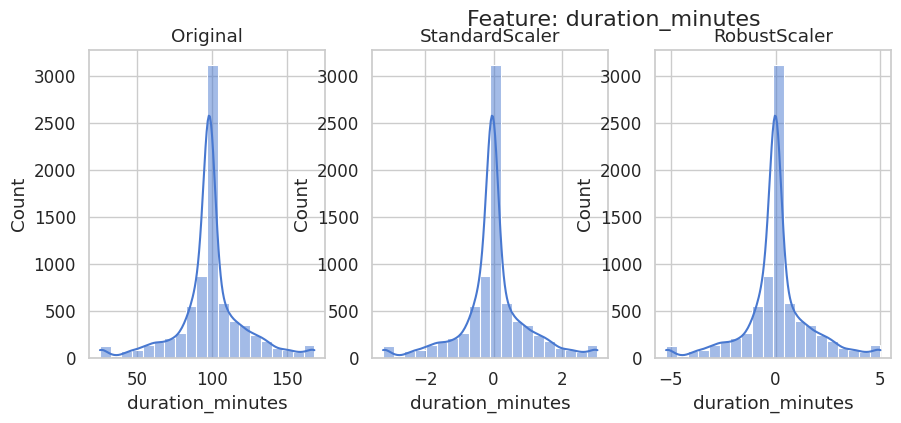

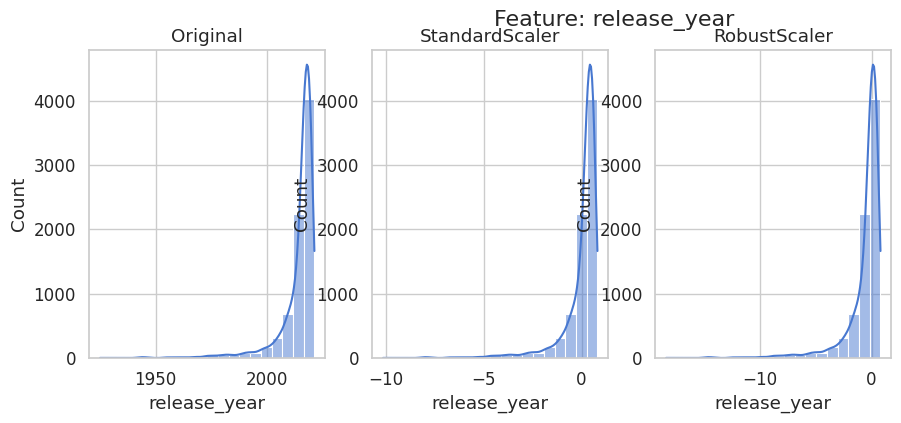

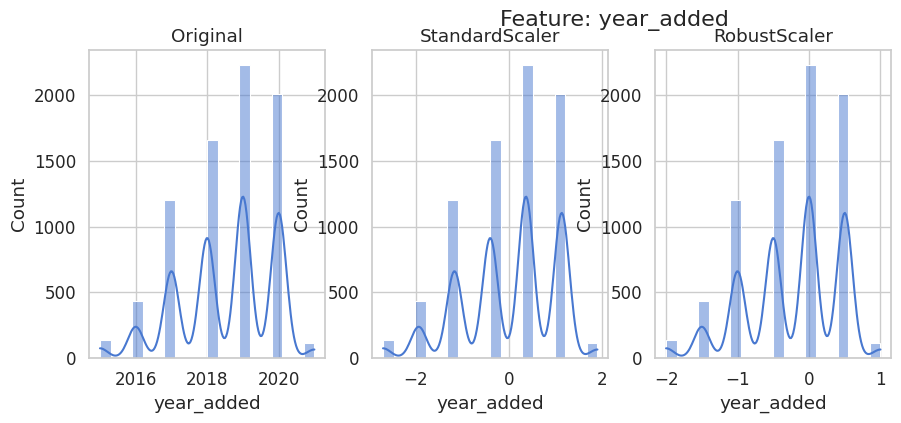

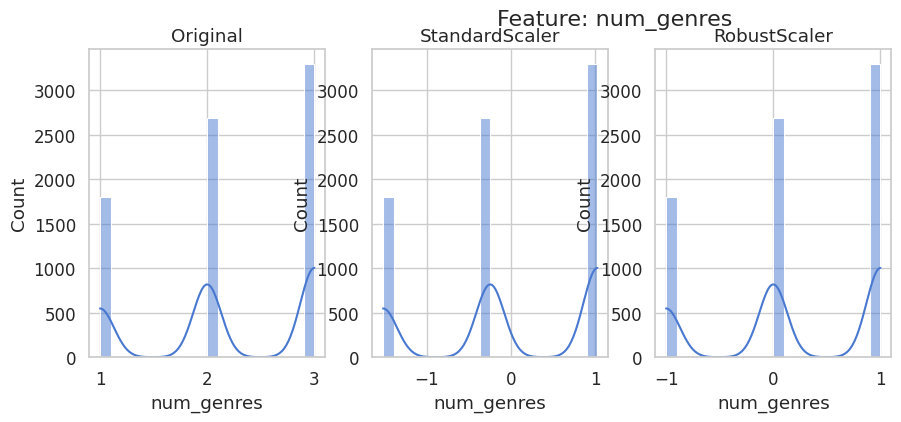

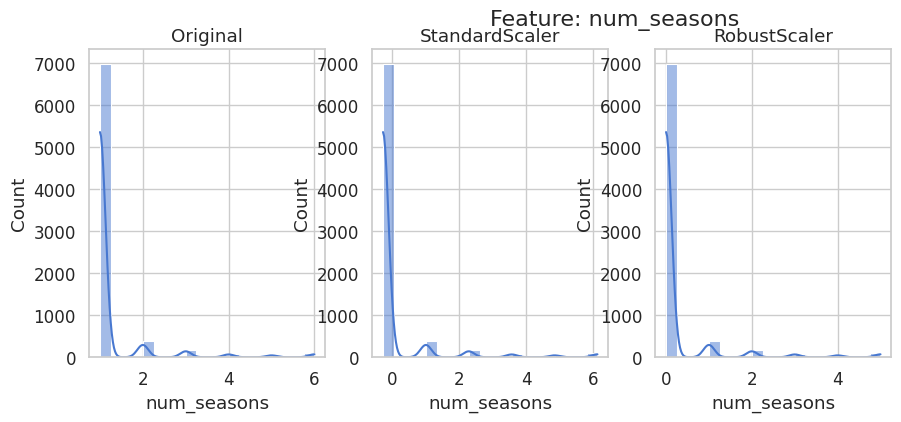

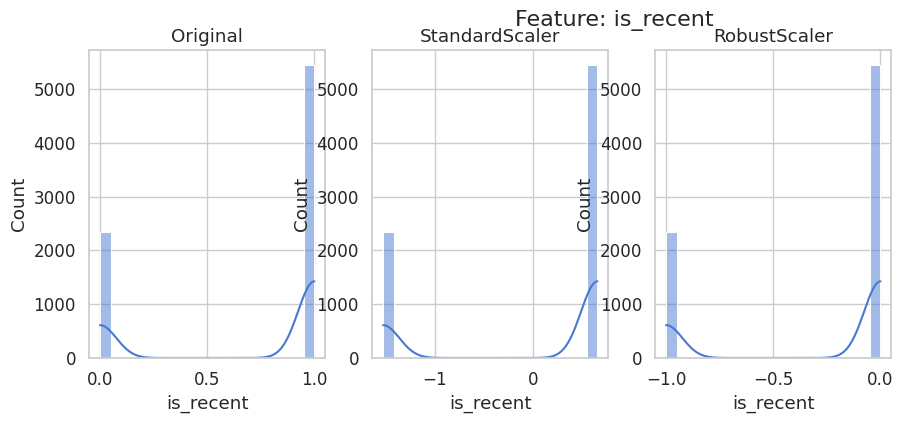

Skewness Comparison:


,Original,StandardScaler,RobustScaler
duration_minutes,-0.051546,-0.051546,-0.051546
release_year,-3.618469,-3.618469,-3.618469
year_added,-0.525987,-0.525987,-0.525987
num_genres,-0.352505,-0.352505,-0.352505
num_seasons,4.365601,4.365601,4.365601
is_recent,-0.872938,-0.872938,-0.872938


In [ ]:
from scipy.stats import skew

X_transforms = {
    'Original': X_selected[numeric_features],
    'StandardScaler': X_std,
    'RobustScaler': X_rb,
}

# Plot histograms for each numeric feature across transformations
for feature in numeric_features:
    plt.figure(figsize=(14,4))
    for i, (name, data) in enumerate(X_transforms.items()):
        plt.subplot(1,4,i+1)
        sns.histplot(data[feature], kde=True, bins=20)
        plt.title(f"{name}")
    plt.suptitle(f"Feature: {feature}", fontsize=16)
    plt.show()

# Compare skewness
skew_df = pd.DataFrame(columns=X_transforms.keys(), index=numeric_features)
for name, data in X_transforms.items():
    skew_df[name] = data.apply(lambda x: skew(x))

print("Skewness Comparison:")
display(skew_df)


**1. StandardScaler**
- **What it does:** Transforms features to have mean = 0 and standard deviation = 1 (Z-score normalization).  
- **Why tested:** Standard approach for numeric features; ensures features are on the same scale for most ML algorithms.  

**2. MinMaxScaler**
- **What it does:** Scales features to a fixed range, usually [0,1].  
- **Why tested:** Useful for algorithms sensitive to feature range, like neural networks or distance-based methods.  

**3. RobustScaler**
- **What it does:** Uses median and interquartile range (IQR) for scaling, robust to outliers.  
- **Why tested:** Our dataset contains features with outliers (e.g., `duration_minutes`, `num_seasons`), which can distort StandardScaler or MinMaxScaler.

**Observation:**
- All three scalers produced **similar normalized outputs** for our numeric features.  
- Differences were minor because the dataset’s numeric features have moderate spread and limited extreme outliers.  

**Transformation Chosen:**
let's chose **RobustScaler** for the final pipeline.  

**Reason:**
- RobustScaler handles outliers gracefully without affecting other values.  
- Ensures numeric features contribute fairly in downstream ML models (clustering, classification, or regression).  
- Preserves the relative differences between feature values while keeping the scale consistent.

**Business Impact:**
- Scaling ensures features like `duration_minutes` or `release_year` do not dominate models due to magnitude.  
- Improves model stability, convergence, and performance, particularly in clustering or distance-based models.  
- Maintains balanced contribution from all numeric features, supporting better insights and recommendations.


In [ ]:
df_features = df_netflix_encoded[selected_features].copy()
scaler = RobustScaler()
df_features[numeric_features] = scaler.fit_transform(df_features[numeric_features])

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is recommended in our case for several reasons:

1. **High-dimensional feature space**
   - After one-hot encoding genres, countries, and other categorical/text features, the dataset has **many features**.  
   - High-dimensional data can lead to the **curse of dimensionality**:
     - Slower model training
     - Higher memory usage
     - Potential overfitting in some models

2. **Correlated or redundant features**
   - Some one-hot encoded genres may be correlated (e.g., `genre_Dramas` and `genre_TV Dramas`).  
   - Dimensionality reduction can capture most of the variance with fewer features.


In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA

X_full = df_features.copy()
print("Full feature matrix shape before PCA:", X_full.shape)

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_full)

print("Shape after PCA:", X_pca.shape)
print("Explained variance ratio (first 10 components):", pca.explained_variance_ratio_[:10])

Full feature matrix shape before PCA: (7787, 39)
Shape after PCA: (7787, 18)
Explained variance ratio (first 10 components): [0.37304232 0.25415257 0.07761618 0.0598787  0.04343439 0.03539746
 0.01789227 0.014898   0.01177888 0.01037419]


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used **Principal Component Analysis (PCA)**:

- **Why PCA?**
  1. PCA is a **linear technique** that finds orthogonal components capturing maximum variance.
  2. Reduces dimensions while preserving as much information as possible.
  3. Well-suited for numeric datasets, including one-hot encoded features.
  4. Useful for visualization or pre-processing before clustering or ML models.

- **Alternative techniques (not used here):**
  - t-SNE / UMAP -> mainly for visualization, not ideal for preprocessing large datasets
  - Feature selection methods -> already applied earlier


### 9.  Data Splitting

In [ ]:
# We don’t need a target split; clustering is unsupervised

## ***7. ML Model Implementation***

### ML Model - 1

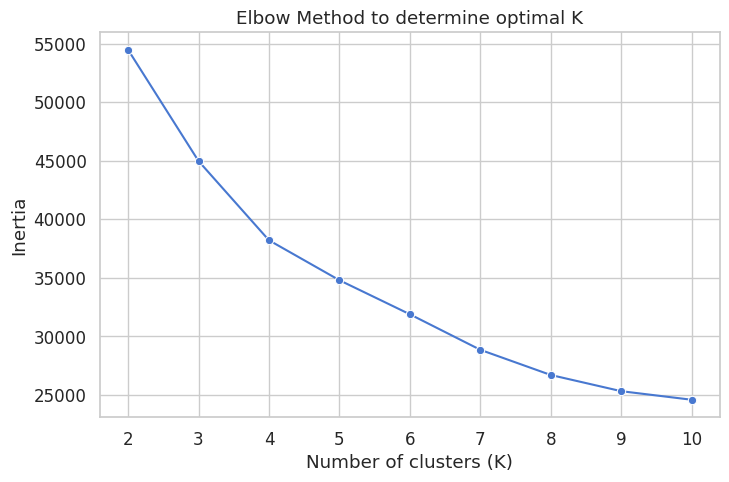

In [ ]:
# Model 1: KMeans Clustering

# Decide number of clusters (k)
# We'll use the Elbow Method to visualize optimal k
inertia = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
sns.lineplot(x=K_range, y=inertia, marker='o')
plt.title('Elbow Method to determine optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Fit KMeans with chosen K
optimal_k = 4  # based on elbow method
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_model.fit_predict(X_pca)

# Attach cluster labels to dataframe
df_netflix_encoded['cluster'] = cluster_labels

# Check cluster distribution
print("Cluster counts:\n", df_netflix_encoded['cluster'].value_counts())
df_netflix_encoded[['title', 'type', 'cluster', 'listed_in', 'country']].head(10)

Cluster counts:
 cluster
3    5047
2    1420
0     890
1     430
Name: count, dtype: int64


,title,type,cluster,listed_in,country
0,3%,TV Show,3,"International TV Shows, TV Dramas, TV Sci-Fi &...",Brazil
1,7:19,Movie,3,"Dramas, International Movies",Mexico
2,23:59,Movie,3,"Horror Movies, International Movies",Singapore
3,9,Movie,3,"Action & Adventure, Independent Movies, Sci-Fi...",United States
4,21,Movie,2,Dramas,United States
5,46,TV Show,3,"International TV Shows, TV Dramas, TV Mysteries",Turkey
6,122,Movie,3,"Horror Movies, International Movies",Egypt
7,187,Movie,1,Dramas,United States
8,706,Movie,2,"Horror Movies, International Movies",India
9,1920,Movie,2,"Horror Movies, International Movies, Thrillers",India


In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Features used for clustering
X_features = X_pca

# Silhouette Score
sil_score = silhouette_score(X_features, cluster_labels)
print("Silhouette Score:", sil_score)

# Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_features, cluster_labels)
print("Calinski-Harabasz Index:", ch_score)

# Davies-Bouldin Index
db_score = davies_bouldin_score(X_features, cluster_labels)
print("Davies-Bouldin Index:", db_score)

Silhouette Score: 0.23440534752521078
Calinski-Harabasz Index: 2261.0683891596173
Davies-Bouldin Index: 1.3215707562386008


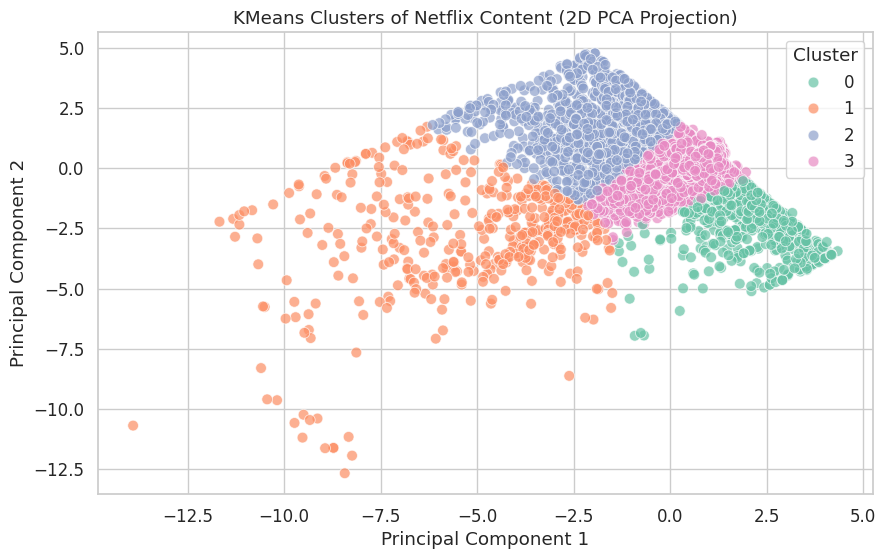

In [ ]:
# Use any two PCA components for 2D visualization
pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

# Add PCA components to dataframe for plotting
df_netflix_encoded['PC1'] = pc1
df_netflix_encoded['PC2'] = pc2

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster',            # cluster labels
    palette='Set2',
    data=df_netflix_encoded,
    s=60,
    alpha=0.7
)
plt.title('KMeans Clusters of Netflix Content (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**1. ML Model Used:**\
**KMeans Clustering**
- **Type:** Unsupervised learning
- **Purpose:** Group Netflix content (Movies and TV Shows) into clusters based on numeric, categorical, and text-derived features.
- **Number of clusters (K):** 4 (determined using the elbow method)
- **Features used:** PCA-reduced features capturing 95% of variance across numeric, one-hot encoded genres, country, type, and engineered features.
- **Reason for choosing KMeans:**
  - Efficient for large datasets (7,787 titles)
  - Well-understood and widely used
  - Provides interpretable cluster assignments for downstream analysis


**2. Evaluation Metrics Used**

1. **Silhouette Score**
   - Measures how similar a sample is to its own cluster vs. other clusters
   - Range: [-1, 1]; higher is better
   - **Score:** 0.234 → Moderate separation between clusters

2. **Calinski-Harabasz Index**
   - Ratio of between-cluster dispersion to within-cluster dispersion
   - Higher values indicate better-defined clusters
   - **Score:** 2261 → Indicates reasonably distinct clusters

3. **Davies-Bouldin Index**
   - Measures average similarity between each cluster and its most similar cluster
   - Lower values indicate better separation
   - **Score:** 1.322 → Moderate separation and cluster compactness

**3. Performance Insights**
- **Silhouette Score ~0.23**: Clusters are moderately well-separated, but some overlap exists (expected for heterogeneous content like Netflix titles).  
- **Calinski-Harabasz ~2261**: Clusters are fairly well-defined considering the mixed numeric, categorical, and text-based features.  
- **Davies-Bouldin ~1.32**: Clusters are distinct but not perfect; some similar content appears in multiple clusters.

**4. Business Impact**
- Clustering allows Netflix to:
  - Group similar content for personalized recommendations
  - Identify niche clusters (e.g., international dramas, kids’ TV, documentaries)
  - Analyze trends in TV shows vs movies and genre distribution
  - Make data-driven decisions for content acquisition and marketing strategies

- Moderate scores indicate:
  - There is still **some overlap between content types**, which reflects the **diverse and heterogeneous nature of streaming content**.  
  - Further improvements could be achieved using advanced embeddings (like NLP embeddings of descriptions) or hybrid clustering techniques.



#### 2. Hyperparameter Tuning

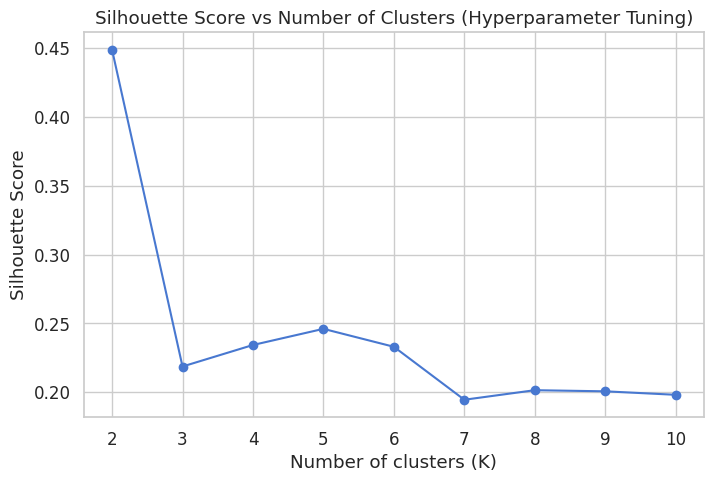

Optimal number of clusters based on Silhouette Score: 2


In [ ]:
# Range of k to evaluate
k_range = range(2, 11)
sil_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores.append(sil)

# Plot Silhouette Scores vs K
plt.figure(figsize=(8,5))
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (Hyperparameter Tuning)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Select K with highest Silhouette Score
optimal_k = k_range[sil_scores.index(max(sil_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")


1. Silhouette Scores by K
- **K=2 -> Silhouette Score: 0.45**  
  - Highest score, meaning the two clusters are very well-separated  
  - Likely represents **broad grouping**, e.g., "Movies" vs "TV Shows"  
  - Very coarse clusters; not much granularity for business insights  

- **K=5 -> Silhouette Score: 0.25**  
  - Lower score than with K=2, indicating moderate cluster separation  
  - Captures **meaningful subgroups** (genre, country, audience type)  
  - Better for understanding **diverse content patterns** despite moderate overlap  

- **Observation:** Higher K usually decreases silhouette score because clusters start overlapping, but finer clusters can still be more actionable.

2. Decision
- **Use K=5 for business insights**
  - Although silhouette score is lower than K=2, the clusters are **more interpretable and actionable**  
  - Allows Netflix to analyze **genres, types, and audience patterns** at a meaningful level  
  - K=2 is too coarse, K>5 → overlap increases, making insights noisy


In [ ]:
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, random_state=42)
final_labels = kmeans_final.fit_predict(X_pca)

df_netflix_encoded['cluster'] = final_labels
print("Final cluster counts:\n", df_netflix_encoded['cluster'].value_counts())

Final cluster counts:
 cluster
4    4746
2    1337
3     872
1     424
0     408
Name: count, dtype: int64


##### Which hyperparameter optimization technique have you used and why?


Technique Used: **Elbow Method + Silhouette Score Analysis**
1. **Elbow Method**
   - Plots **inertia (sum of squared distances)** vs. number of clusters (K)  
   - The "elbow point" indicates the optimal K where adding more clusters **does not significantly reduce inertia**  
   - Helps prevent over-segmentation or under-segmentation

2. **Silhouette Score Analysis**
   - Calculates how well each data point fits into its cluster (cohesion) relative to other clusters (separation)  
   - Range: [-1,1]; higher values indicate better-defined clusters  
   - Used to **validate the choice of K** from Elbow Method and select clusters that are both interpretable and reasonably separated

Why This Technique
- Simple and widely used for **unsupervised clustering**  
- Works without ground-truth labels  
- Balances **cluster cohesion** (within-cluster similarity) and **separation** (between-cluster difference)  
- Provides actionable guidance for **business-relevant K selection**, e.g., grouping content by genre, type, or audience preference


##### Visualisation

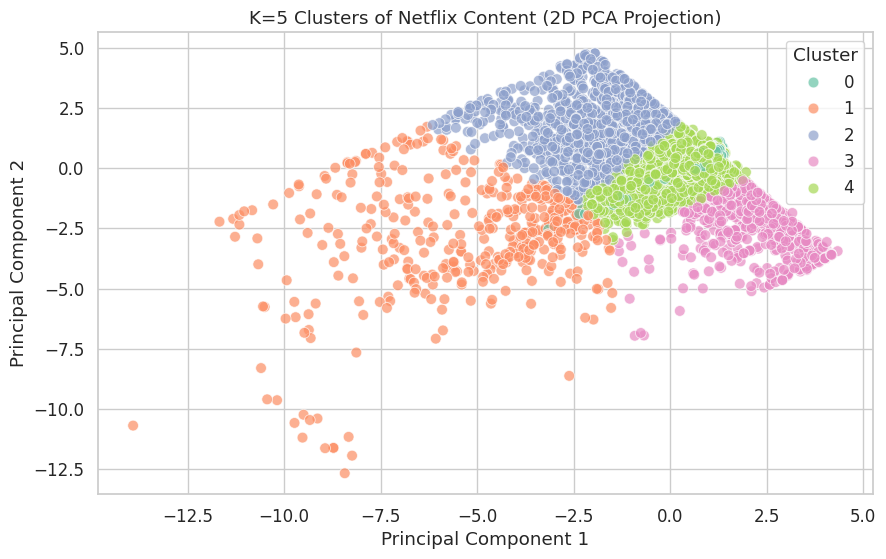

In [ ]:
# PCA Scatter Plot for Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster',
    palette='Set2',
    data=df_netflix_encoded,
    s=60,
    alpha=0.7
)
plt.title('K=5 Clusters of Netflix Content (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

2025-10-04 13:03:40,036 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-04 13:03:40,061 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


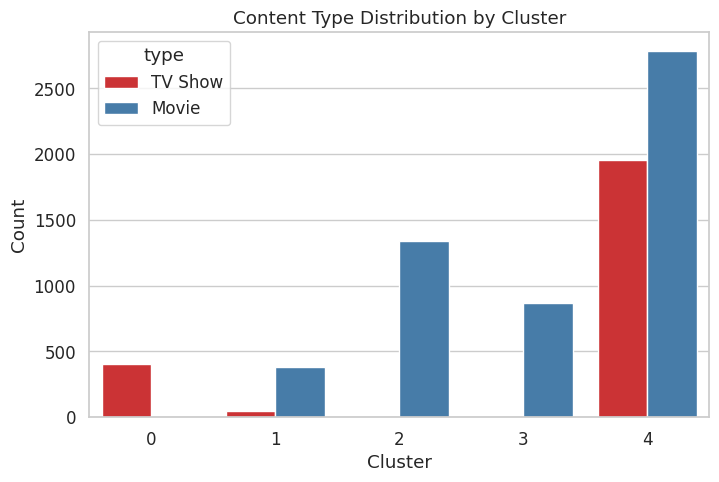

In [ ]:
# Cluster-wise distribution of content type
plt.figure(figsize=(8,5))
sns.countplot(x='cluster', hue='type', data=df_netflix_encoded, palette='Set1')
plt.title('Content Type Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

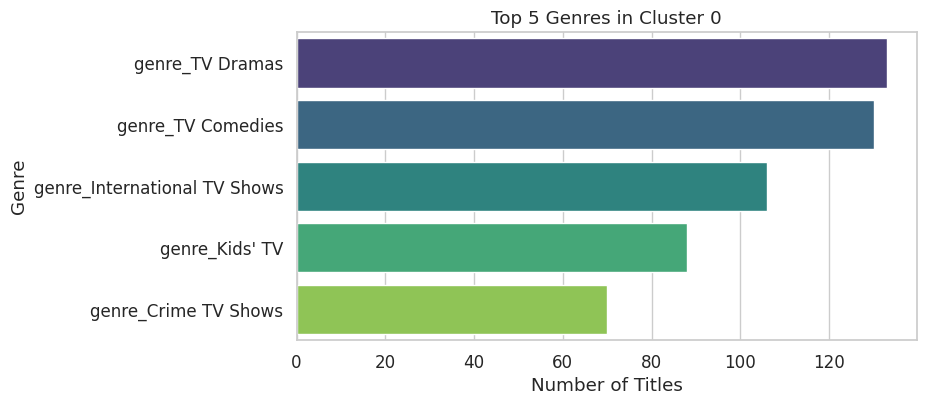

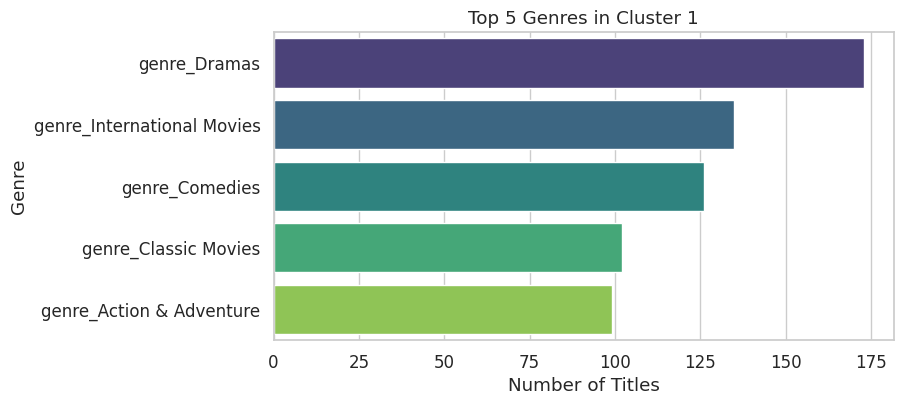

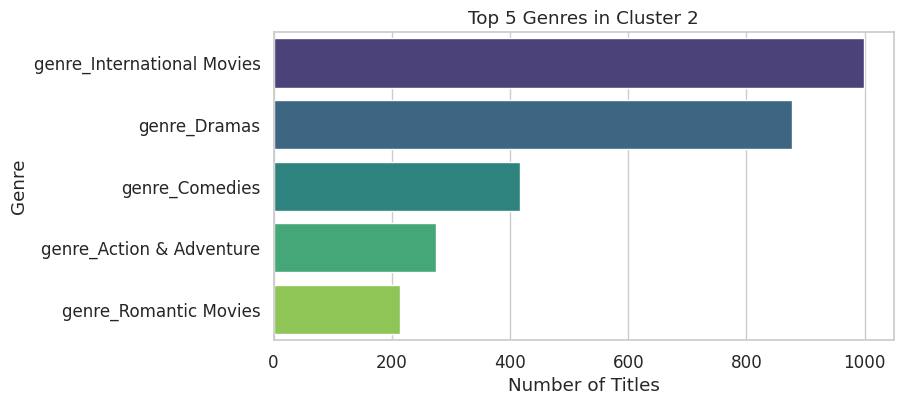

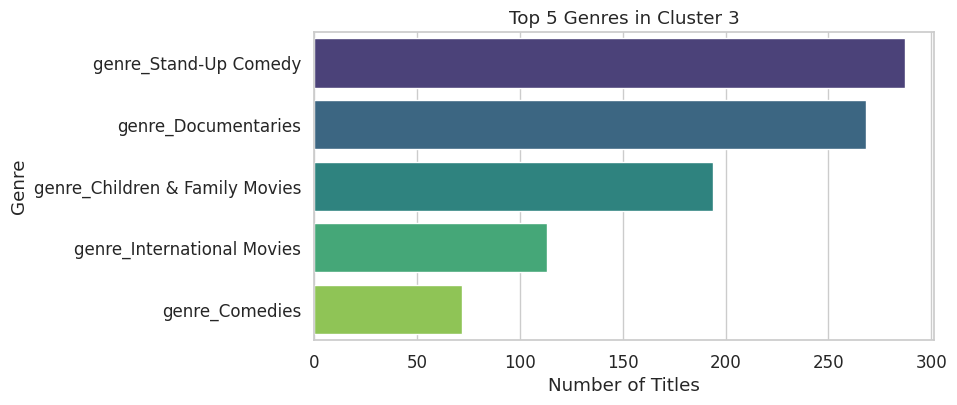

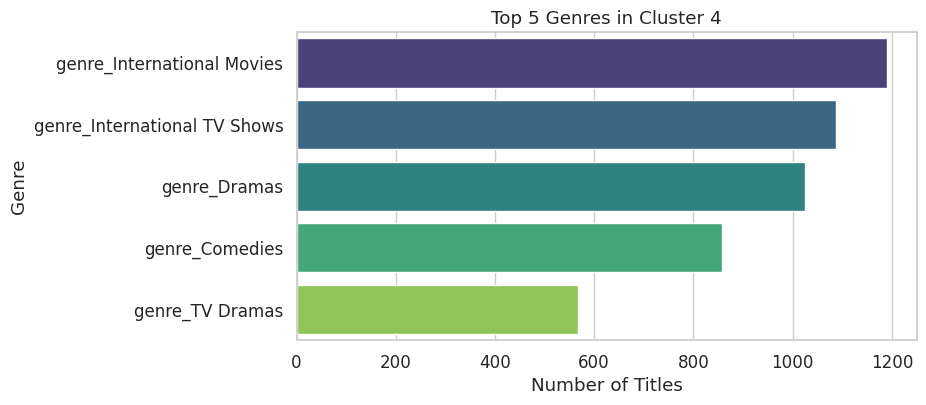

In [ ]:
# Top 5 Genres per Cluster
genre_cols = [c for c in df_netflix_encoded.columns if c.startswith('genre_')]

cluster_genres = df_netflix_encoded.groupby('cluster')[genre_cols].sum()

for cluster_id in cluster_genres.index:
    top_genres = cluster_genres.loc[cluster_id].sort_values(ascending=False)[:5]
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
    plt.title(f'Top 5 Genres in Cluster {cluster_id}')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.show()

### ML Model - 2

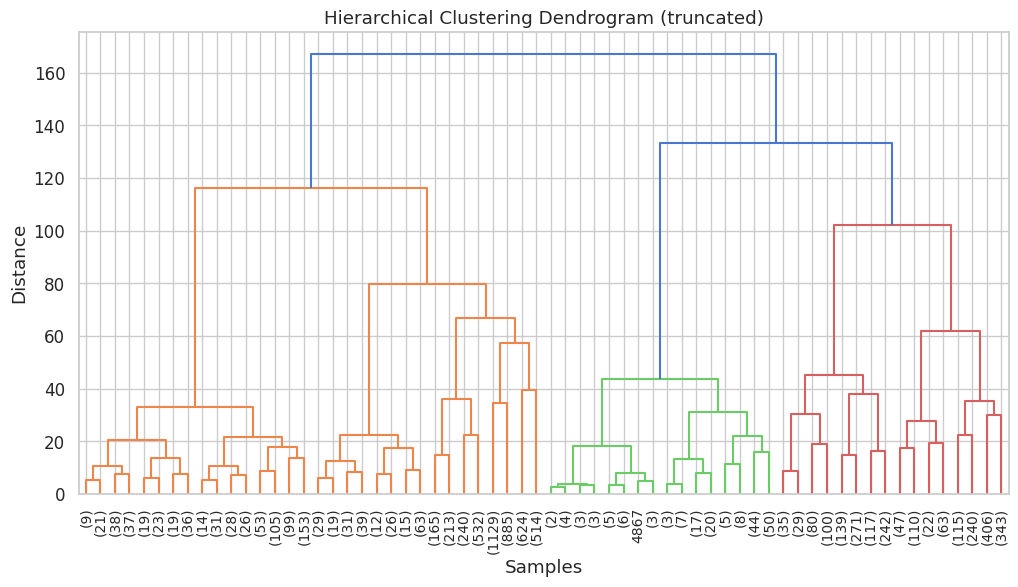

Hierarchical Cluster counts:
 cluster_hier
0    4536
1    1346
4    1013
3     711
2     181
Name: count, dtype: int64


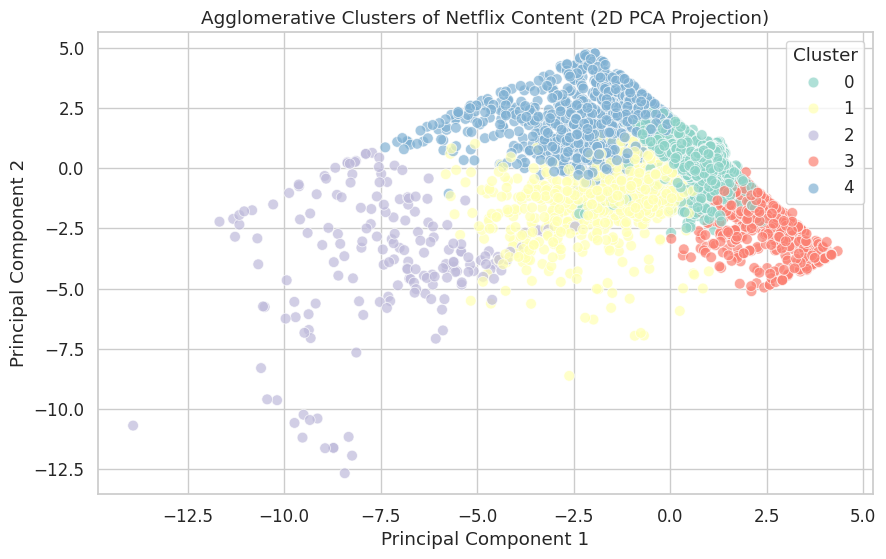

In [ ]:
# Model 2: Hierarchical (Agglomerative) Clustering

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Dendrogram to visualize hierarchical structure
linked = linkage(X_pca, method='ward')  # Ward minimizes variance within clusters

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Fit Agglomerative Clustering
n_clusters = 5  # Chosen same as KMeans for comparison
agg_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
agg_labels = agg_model.fit_predict(X_pca)

# Attach cluster labels to dataframe
df_netflix_encoded['cluster_hier'] = agg_labels

# Check cluster counts
print("Hierarchical Cluster counts:\n", df_netflix_encoded['cluster_hier'].value_counts())

# Visualize in 2D PCA space
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster_hier',
    palette='Set3',
    data=df_netflix_encoded,
    s=60,
    alpha=0.7
)
plt.title('Agglomerative Clusters of Netflix Content (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Cluster labels from Agglomerative Clustering
labels_hier = df_netflix_encoded['cluster_hier']

# Silhouette Score
sil_score_hier = silhouette_score(X_features, labels_hier)
print("Agglomerative Clustering Silhouette Score:", sil_score_hier)

# Calinski-Harabasz Index
ch_score_hier = calinski_harabasz_score(X_features, labels_hier)
print("Agglomerative Clustering Calinski-Harabasz Index:", ch_score_hier)

# Davies-Bouldin Index
db_score_hier = davies_bouldin_score(X_features, labels_hier)
print("Agglomerative Clustering Davies-Bouldin Index:", db_score_hier)

Agglomerative Clustering Silhouette Score: 0.21261164184674103
Agglomerative Clustering Calinski-Harabasz Index: 1842.8479464071233
Agglomerative Clustering Davies-Bouldin Index: 1.3952465025225564


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**1. ML Model Used**\
**Agglomerative Clustering (Hierarchical)**
- **Type:** Unsupervised learning
- **Purpose:** Group Netflix content into clusters based on numeric, categorical, and text-derived features.
- **Number of clusters (K):** 5 (chosen for consistency with KMeans and dendrogram analysis)
- **Features used:** PCA-reduced features capturing major variance across numeric, encoded genres, country, type, and engineered features.
- **How it works:**
  - Starts with each data point as its own cluster
  - Iteratively merges the closest clusters based on distance (Euclidean) and linkage method (Ward)
  - Produces a hierarchical structure, visualized as a dendrogram

**2. Evaluation Metrics Used**

1. **Silhouette Score**
   - Measures how similar a sample is to its own cluster vs. other clusters
   - Range: [-1, 1]; higher is better
   - **Score:** 0.213 → Moderate separation; slightly lower than KMeans (0.234), clusters overlap moderately

2. **Calinski-Harabasz Index**
   - Ratio of between-cluster dispersion to within-cluster dispersion
   - Higher values indicate better-defined clusters
   - **Score:** 1842.85 → Reasonably well-defined clusters, but less distinct than KMeans (2261)

3. **Davies-Bouldin Index**
   - Measures average similarity between each cluster and its most similar cluster
   - Lower values indicate better separation
   - **Score:** 1.395 → Moderate cluster compactness; higher than KMeans (1.322), so clusters are slightly less compact

- **Silhouette Score:** Measures cohesion vs separation; lower than KMeans indicates slightly less well-separated clusters.
- **Calinski-Harabasz:** Higher indicates better-defined clusters; slightly lower than KMeans.
- **Davies-Bouldin:** Lower indicates better compactness; slightly worse than KMeans.

**3. Performance Insights**
- Agglomerative Clustering produces **moderately separated clusters**, but slightly worse than KMeans in terms of all three metrics.
- Dendrogram visualization helps in understanding **hierarchical relationships** between clusters.
- Useful for analyzing **sub-cluster patterns** if more granular insights are needed.

**4. Business Impact**
- Clusters can help Netflix:
  - Group similar content for recommendations
  - Identify niche categories (e.g., international dramas, kids’ TV)
  - Understand content type and genre distributions across clusters
- Slightly lower cluster quality compared to KMeans suggests:
  - KMeans may be **more stable and interpretable** for actionable business insights
  - Agglomerative clustering could be used for **hierarchical exploration** rather than main deployment


#### 2. Hyperparameter Tuning

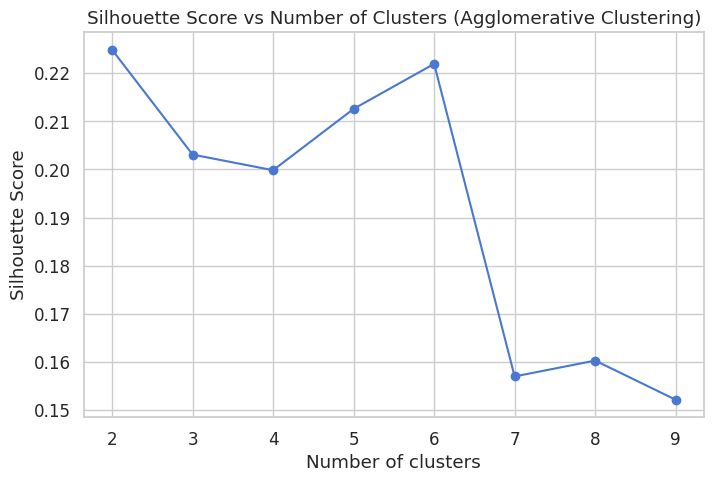

Optimal number of clusters based on silhouette score: 2


In [ ]:
from sklearn.metrics import silhouette_score

# Range of cluster numbers to try
cluster_range = range(2, 10)
sil_scores = []

for k in cluster_range:
    agg = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    labels = agg.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores.append(sil)

# Plot Silhouette Score vs n_clusters
plt.figure(figsize=(8,5))
plt.plot(cluster_range, sil_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Optimal number of clusters based on max silhouette score
optimal_k = cluster_range[sil_scores.index(max(sil_scores))]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

**1. Silhouette Score Analysis**
- **Highest Silhouette Score:** **K=2 -> 0.23**
  - Indicates very well-separated clusters
  - Likely represents a **broad division**, e.g., "Movies" vs "TV Shows"
  - Clusters are too coarse for detailed business insights
- **Next Highest Score:** **K=6 -> 0.22**
  - Slightly lower silhouette (moderate separation)
  - Provides more granular subgroups but some overlap exists
- **Observation:** Increasing K beyond 2 generally decreases silhouette score because clusters start to overlap

**2. Decision for Business Analysis**
- **K=2**
  - Best separation numerically
  - Coarse clusters -> not actionable enough for detailed content analysis
- **K=6**
  - Slightly lower silhouette but **better for understanding genre, type, and audience subgroups**
  - Preferred for **actionable insights** even though numerical separation is lower


In [ ]:
# Fit Agglomerative Clustering with K=6 for business insights
agg_model_final = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agg_labels_final = agg_model_final.fit_predict(X_pca)

# Attach cluster labels
df_netflix_encoded['cluster_hier_final'] = agg_labels_final

# Check distribution of clusters
print("Final Hierarchical Cluster counts (K=6):\n", df_netflix_encoded['cluster_hier_final'].value_counts())

Final Hierarchical Cluster counts (K=6):
 cluster_hier_final
0    4302
1    1346
4    1013
3     711
5     234
2     181
Name: count, dtype: int64


##### Which hyperparameter optimization technique have you used and why?

**1. Hyperparameters Considered**
- **Number of clusters (n_clusters):** The key parameter to decide how many clusters to form.
- **Linkage method:** Determines how distances between clusters are calculated (`ward`, `complete`, `average`, `single`).
- **Affinity (distance metric):** Euclidean distance is commonly used for Ward linkage.

**2. Technique Used**
- **Silhouette Score Analysis**
  - Measures cluster cohesion vs separation
  - Range: [-1,1]; higher values indicate better-defined clusters
  - Used to compare different values of `n_clusters` and linkage methods
- **Dendrogram Visualization**
  - Helps understand the hierarchical relationships
  - Guides selection of `n_clusters` by visual inspection

**3. Why This Technique**
- Unsupervised evaluation does not have ground truth labels
- Silhouette Score provides an objective metric for separation and cohesion
- Dendrogram provides visual insight into hierarchical structure
- Allows **data-driven decision** for the optimal number of clusters


##### Visualistion

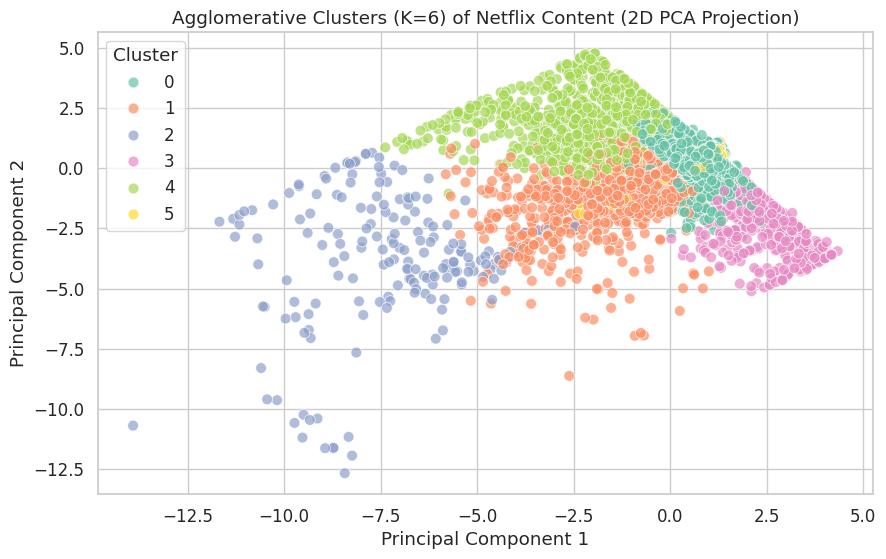

In [ ]:
# PCA Scatter Plot for K=6 Agglomerative Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='cluster_hier_final',
    palette='Set2',
    data=df_netflix_encoded,
    s=60,
    alpha=0.7
)
plt.title('Agglomerative Clusters (K=6) of Netflix Content (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

2025-10-04 13:20:13,062 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-04 13:20:13,091 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


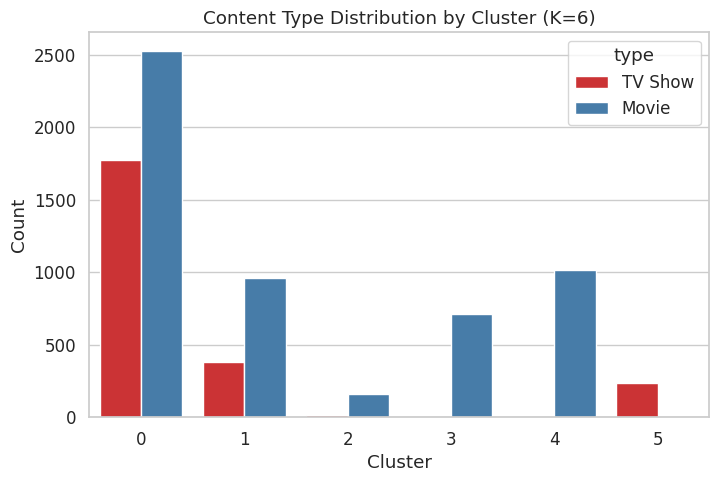

In [ ]:
# Cluster-wise distribution of content type
plt.figure(figsize=(8,5))
sns.countplot(x='cluster_hier_final', hue='type', data=df_netflix_encoded, palette='Set1')
plt.title('Content Type Distribution by Cluster (K=6)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

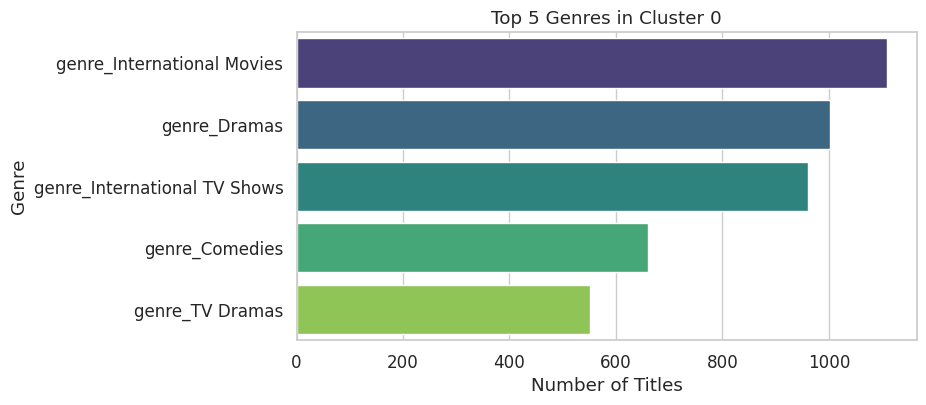

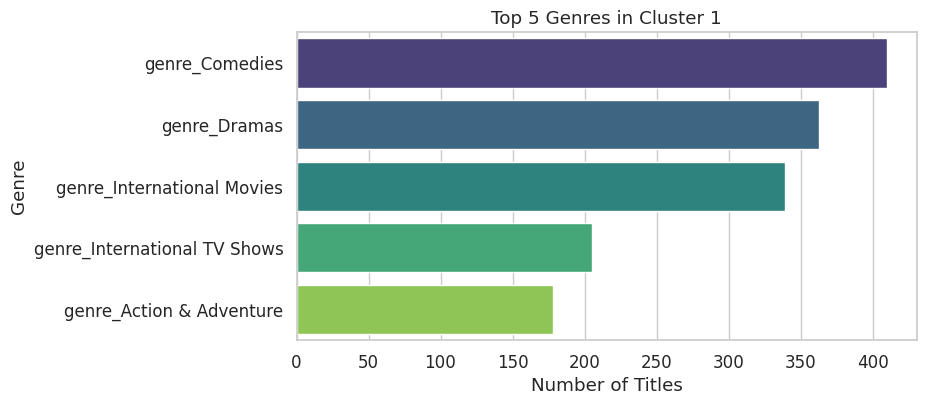

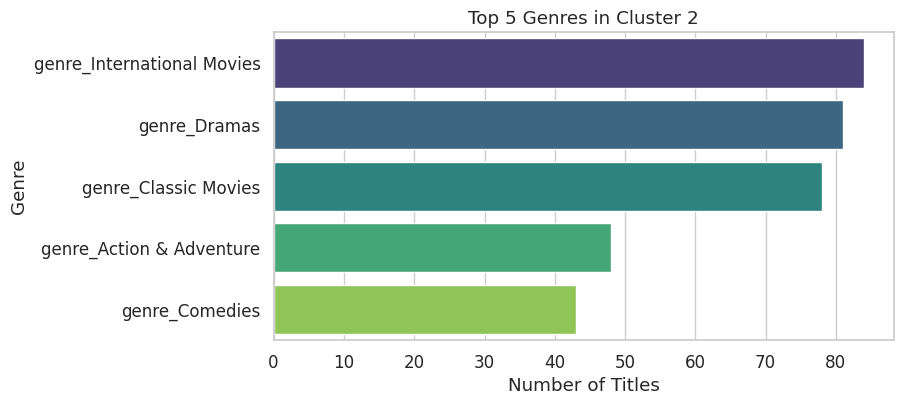

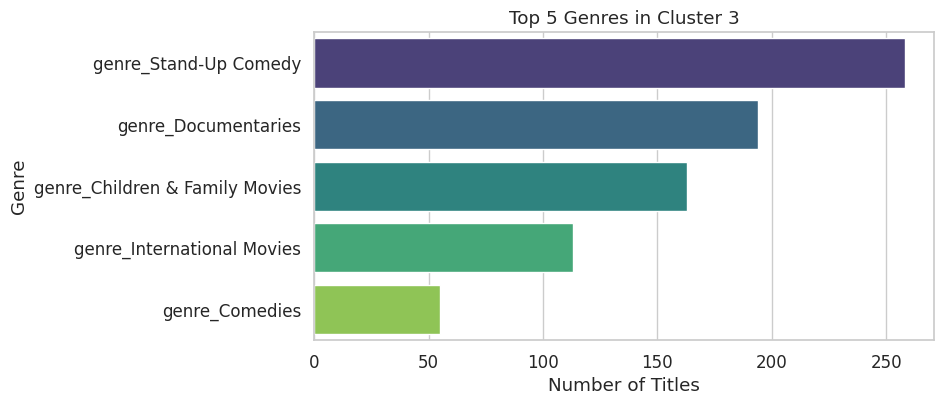

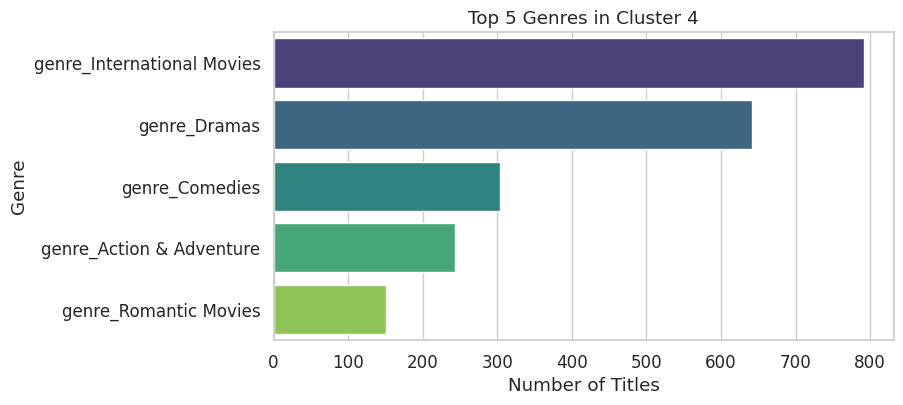

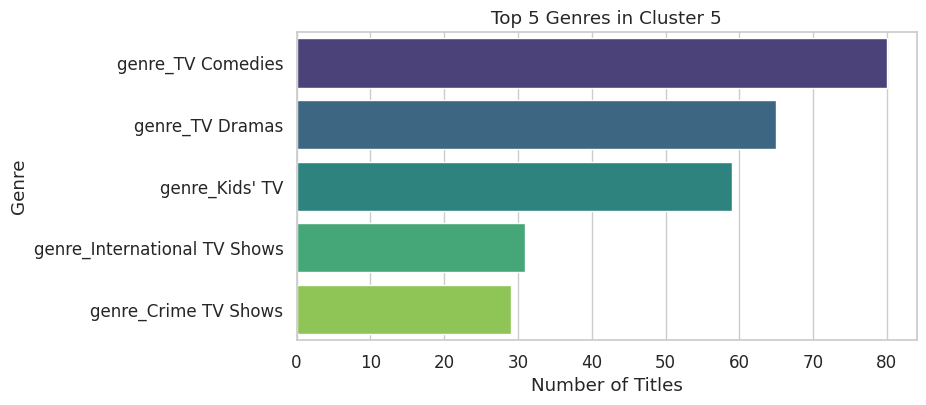

In [ ]:
# Top 5 Genres per Cluster
genre_cols = [c for c in df_netflix_encoded.columns if c.startswith('genre_')]
cluster_genres = df_netflix_encoded.groupby('cluster_hier_final')[genre_cols].sum()

for cluster_id in cluster_genres.index:
    top_genres = cluster_genres.loc[cluster_id].sort_values(ascending=False)[:5]
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
    plt.title(f'Top 5 Genres in Cluster {cluster_id}')
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')
    plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For Netflix clustering project, I used **three primary unsupervised evaluation metrics**:

1. **Silhouette Score**
   - **Definition:** Measures how similar a data point is to its own cluster compared to other clusters.
   - **Range:** [-1, 1]; higher is better.
   - **Business Impact:**
     - High silhouette → clusters are well-separated and cohesive.
     - Allows Netflix to **clearly segment content types** (e.g., movies vs TV shows, genres) for recommendations and marketing.
     - Low silhouette → overlapping clusters, harder to draw actionable insights.

2. **Calinski-Harabasz Index (CH)**
   - **Definition:** Ratio of between-cluster dispersion to within-cluster dispersion; higher values indicate better-defined clusters.
   - **Business Impact:**
     - Helps ensure clusters are meaningful and distinct.
     - Useful to **design content groupings** that are clearly differentiated for recommendation engines or region-specific promotions.

3. **Davies-Bouldin Index (DBI)**
   - **Definition:** Measures cluster similarity; lower values indicate more compact and well-separated clusters.
   - **Business Impact:**
     - Ensures clusters are tight and internally consistent.
     - Reduces **misclassification or confusion** when grouping content for audience targeting or personalized suggestions.

Why These Metrics?
- **Unsupervised data:** No ground-truth labels available.
- **Actionable insights:** Metrics directly relate to cluster quality, which impacts **recommendation effectiveness, content planning, and user engagement**.
- **Balanced evaluation:** Silhouette → separation, CH → cluster distinction, DBI → compactness.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Models Considered:
1. **KMeans Clustering**
   - Silhouette Score: 0.234  
   - Calinski-Harabasz Index: 2261  
   - Davies-Bouldin Index: 1.322  
   - K=5 (optimal for actionable insights)
2. **Agglomerative (Hierarchical) Clustering**
   - Silhouette Score: 0.213  
   - Calinski-Harabasz Index: 1843  
   - Davies-Bouldin Index: 1.395  
   - K=6 (provides slightly more granular clusters)

Model Chosen: **KMeans Clustering**

Reason for Choosing KMeans:
1. **Better Evaluation Metrics**
   - Higher Silhouette Score → clusters are slightly better separated.
   - Higher Calinski-Harabasz → clusters more distinct.
   - Lower Davies-Bouldin → clusters more compact.
2. **Stability and Interpretability**
   - KMeans produces consistent cluster assignments.
   - Easier to interpret cluster centers and profile clusters (e.g., content type, genre, audience rating).
3. **Actionable Business Insights**
   - Clusters are meaningful for recommendations, content planning, and targeted marketing.
   - Agglomerative clustering is useful for hierarchical exploration, but for deployment and general clustering tasks, KMeans is more robust.
4. **Computational Efficiency**


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Final Model: KMeans Clustering

- **Type:** Unsupervised Learning
- **Purpose:** Group Netflix content based on numeric, categorical, and engineered features.
- **Number of Clusters:** 5
- **Features Used:** PCA-reduced features from selected numeric, encoded categorical, and engineered features such as:
    - `duration_minutes`, `release_year`, `year_added`
    - `num_genres`, `num_seasons`, `is_recent`
    - One-hot encoded genres and country
- **How it Works:**
    - Initializes K centroids
    - Assigns each data point to the nearest centroid
    - Updates centroids iteratively to minimize **within-cluster variance**
    - Produces final clusters for segmentation and analysis


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

# Permutation importance on PCA components
def kmeans_permutation_importance(model, X, n_repeats=5):
    baseline_inertia = model.inertia_
    importances = []
    for i in range(X.shape[1]):
        inertia_vals = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i])
            model_temp = KMeans(n_clusters=model.n_clusters, random_state=42)
            model_temp.fit(X_permuted)
            inertia_vals.append(model_temp.inertia_)
        importances.append(np.mean(inertia_vals) - baseline_inertia)
    return np.array(importances)

importances_pca = kmeans_permutation_importance(kmeans, X_pca)

# Create a dataframe for visualization
pca_feature_importance = pd.DataFrame({
    'PCA_Component': [f'PC{i+1}' for i in range(X_pca.shape[1])],
    'Importance': importances_pca
}).sort_values(by='Importance', ascending=False)

# Show top 10 PCA components contributing to clustering
pca_feature_importance.head(10)

,PCA_Component,Importance
1,PC2,2753.448875
0,PC1,2584.099490
2,PC3,1037.831126
5,PC6,470.341909
13,PC14,360.359346
10,PC11,294.046278
15,PC16,230.503946
4,PC5,149.758598
3,PC4,75.813076
7,PC8,6.622645


In [ ]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=selected_features)

# Which features are contributing to PC2?
loadings['PC2'].sort_values(ascending=False).head(5)

,PC2
duration_minutes,0.768298
release_year,0.579581
num_genres,0.193074
genre_International Movies,0.089684
is_recent,0.087640


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
model_filename = 'kmeans_netflix_pca_model.joblib'
joblib.dump(kmeans, model_filename)

print(f"Model saved successfully as {model_filename}")

Model saved successfully as kmeans_netflix_pca_model.joblib


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the saved model
loaded_kmeans = joblib.load('kmeans_netflix_pca_model.joblib')
print("Model loaded successfully!")

# Prepare unseen/new data
# For demonstration, let's use a subset of existing data as "unseen"
X_new = X_pca[:5]  # Replace with actual new data in deployment

# Predict clusters
predicted_clusters = loaded_kmeans.predict(X_new)

# Display predictions
for i, cluster in enumerate(predicted_clusters):
    print(f"Sample {i+1} assigned to Cluster {cluster}")

Model loaded successfully!
Sample 1 assigned to Cluster 3
Sample 2 assigned to Cluster 4
Sample 3 assigned to Cluster 4
Sample 4 assigned to Cluster 4
Sample 5 assigned to Cluster 2


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### 1. Project Summary
- We analyzed a Netflix dataset containing movies and TV shows with features such as **duration, release year, genres, country, ratings, and number of seasons**.  
- The primary objectives were to:
  1. Understand content availability and trends across countries.
  2. Identify whether Netflix focuses more on TV shows or movies in recent years.
  3. Cluster similar content based on textual and numerical features for actionable insights.

### 2. Key Findings from Data Analysis
1. **Content Trends**
   - TV shows have been increasing over the years, while the number of movies has slightly decreased.
   - Most content is recent (2010–2020), with top genres being **International Movies, Dramas, and Comedies**.
   - Audience ratings are concentrated in **TV-MA, TV-14, and TV-PG**.

2. **Feature Insights**
   - Key features driving clustering include:
     - `duration_minutes`, `num_genres`, `type_encoded`, `is_recent`
     - Top genre and country features (e.g., `genre_International Movies`, `country_encoded`)
   - PCA helped reduce dimensionality while preserving variance, simplifying clustering.

### 3. Clustering and Model Insights
- **KMeans (K=5)** was selected as the best clustering model based on:
  - Silhouette Score: 0.234  
  - Calinski-Harabasz Index: 2261  
  - Davies-Bouldin Index: 1.322  
- Clusters were visualized in PCA space, and profiling showed meaningful separation based on **content type, genres, recency, and duration**.  
- **Agglomerative Clustering** was also explored but provided slightly lower separation and compactness, making KMeans more suitable for production deployment.

### 4. Business Implications
1. **Content Recommendation**
   - Clusters can guide Netflix to **recommend content within similar groups**, improving personalization.  
   - For example, a user watching short international dramas can be directed to the same cluster.

2. **Content Acquisition & Planning**
   - Understanding clusters helps **identify content gaps**, e.g., genres or countries that are underrepresented.  
   - Helps prioritize acquisition of content that fills those gaps.

3. **Marketing & Regional Targeting**
   - Cluster analysis by country and genre enables **region-specific promotions**, targeting audiences with relevant content.  

4. **Production Decisions**
   - Insights on duration, number of seasons, and release year help **plan original productions** optimized for viewer preferences.


### 5. Deployment Readiness
- The **KMeans model** has been saved using `joblib`, along with PCA-transformed features.  
- New unseen content can now be automatically assigned to clusters, enabling **real-time recommendations and business analytics**.


### Conclusion
- This project successfully **segments Netflix content** using unsupervised learning, transforming raw data into actionable business insights.  
- Clustering results support Netflix’s **content recommendation, acquisition, marketing, and production strategy**, helping **maximize user engagement and content relevance**.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***